<a href="https://colab.research.google.com/github/intelligent-environments-lab/CityLearn/blob/master/examples/citylearn_ccai_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# MIT License
#
#@title Copyright (c) 2023 CCAI Community Authors { display-mode: "form" }
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# CityLearn: A Tutorial on Reinforcement Learning Control for Grid-Interactive Efficient Buildings and Communities
---

Authors:
*   [Kingsley Nweye](https://kingsleynweye.com), The University of Texas at Austin, [nweye@utexas.edu](mailto:nweye@utexas.edu)
*   [Allen Wu](https://www.linkedin.com/in/allenjeffreywu), The University of Texas at Austin, [allen.wu@utexas.edu](mailto:allen.wu@utexas.edu)
* [Hyun Park](https://github.com/HyunPark21), The University of Texas at Austin, [hyun_0421@utexas.edu](mailto:hyun_0421@utexas.edu)
*   [Zoltan Nagy](https://www.caee.utexas.edu/people/faculty/faculty-directory/nagy), The University of Texas as Austin, [nagy@utexas.edu](mailto:nagy@utexas.edu)

This tutorial notebook will help users get acquainted with the [CityLearn](https://www.citylearn.net) OpenAI Gym environment, developed for the easy implementation and benchmarking of control algorithms, e.g., rule-based control, model predictive control or deep reinforcement learning control in the demand response, building energy and grid-interactive community domain. By the end of the tutorial, participants will learn about intelligent control algorithms to provide energy flexibility, and acquire familiarity with CityLearn environment for extended use in personal projects.

# Table of Contents
---

> Coming soon 🙂


# Glossary
***

- EV - electric vehicle
- GEB - grid-interactive efficient building
- KPI - key performance indicator
- MPC - model predictive control
- PV - photovoltaic
- RBC - rule-based control
- RLC - reinforcement learning control
- SoC - state of charge
- TOU - time of use
- ZNE - zero net energy

<a name="overview"></a>
# Overview
---

<!-- In this section, kindly provide a summary of the main contributions of the tutorial notebook. Note that the tutorial should introduce or demonstrate the use of a method, dataset, tool, or technology to address a problem related to climate change. Be clear on the goal of the tutorial and the expected learning outcomes for the users. 

Example contributions include:
*   Leveraging existing libraries, packages, or frameworks to tackle a real-world climate-related challenge using machine learning.
*   Introducing a new climate-related benchmark dataset, applying machine learning methods, and presenting baseline results.
*   Developing new tools or libraries and demonstrating its application to a specific problem in climate change. -->
This workshop will consist of a presentation of the underlying background for CityLearn and its relevance to climate change mitigation. We provide a walk-through tutorial on how to set up and interact with the simulation environment using a realworld dataset from a grid-interactive residential community in Fontana, California. 

This notebook will provide a guide on how to use a simple rule-based control architecture and advanced reinforcement control algorithms to manage batteries in each home in the community with a goal of minizing the cost of purchased electricity, carbon emissions associated with consuming electricity from the grid, as well as improve on ther grid-level KPIs e.g. peak demand, load factor and ramping that are critical for the long-term sustainability of decarbonizing existing power generation sources on the supply side and electrification of buildings on the demand side.

## Contributions

The primary contribution of the CityLearn Workshop is to introduce the software tool CityLearn to model and benchmark simple and advanced control strategies in grid-interactive smart communities, e.g., demand response and load shaping in buildings. The secondary contribution is to bring awareness to datasets for controls research that are provided within the CityLearn environment.

## Learning Outcomes

The primary learning outcome for participants is to gain familiarity with CityLearn environment, its API and dataset offerings for extended use in personal projects. Other secondary outcomes are to:

1. Understand how electrification, distributed energy resources e.g. battery, PV and smart controls provide a promising pathway for decarbonization and energy flexibility.
2. Learn how to design and optimize their own expert RBC for battery management using readily available knowledge of a building's energy use.
3. Identify the challenges surrounding the generalizability of expert systems e.g. RBC and how RL can mitigate these challenges.
4. Optimize their own RL tabular Q-Learning algorithm.
5. Evaluate the performance of standard model-free deep RL algorithms in optimizing KPIs that are targeted at quantifying the have learn about the 
6. Learn the effect of different control algorithms in improving KPIs

<a name="climate-impact"></a>
# Climate Impact
---

<!-- In this section, describe in more detail how the methods or tools introduced in this tutorial could have pathways to positive impact regarding climate change. The problem should be clearly explained and motivated for non-experts. Feel free to discuss relevant research works, real-world examples of successful applications, and/or climate startups or organizations that are making an impact using similar methods or tools to address climate-related challenges. 

We also ask that authors emphasize the real-world impact of the methods, specifically: Who will be using the models/outputs and how will they be used? What decisions will be made based on these models? How will they impact existing systems/the environment/affected communities on the ground? -->

The residential building stock in the United States is responsible for 21% ([Energy Information Administration, 2022](https://www.eia.gov/totalenergy/data/monthly/archive/00352211.pdf)) of energy consumption and 20% of greenhouse gas emissions ([Goldenstein et al., 2020](https://doi.org/10.1073/pnas.1922205117)). Electrification of end-uses, as well as decarbonizing the electrical grid through renewable energy sources such as solar and wind, constitutes the pathway to zero-emission buildings ([Leibowicz et al., 2018](https://doi.org/10.1016/j.apenergy.2018.09.046)). However, electrifying fossil-fueled building end-uses in fact could increase the demand on the existing electricity power grid and if power generation sources are not decarbonized at a similar rate as electrification happening on the demand side, will in fact result in adverse effects of increased green house gas emissions! Also, new grid infrastructure constitutes a significant capital investment and requires extensive planning and execution.

Through distributed energy resources (DER), buildings can provide flexibility services to the existing grid infrastructure in demand response events. On-site solar photovoltaic systems can also reduce dependence on the grid through self-generation. Yet, the intermittency of renewable energy sources introduces additional challenges of grid instability due to a mismatch between electricity generation (supply) and demand ([Suberu et al., 2014](https://doi.org/10.1016/j.rser.2014.04.009)). 

<!-- The California so-called duck-curve is a good illustration of the mismatch in renewable supply and demand, and shows effect of increased PV penetration that may lead to high ramp rate after the sun sets in the evening which the electric power grid may bit be able to handle ([Denholm et al., 2008](https://www.nrel.gov/docs/fy08osti/42305.pdf)). -->

Advanced control algorithms including model-predictive control (MPC) and reinforcement learning control (RLC) are thus, critical to properly manage DERs and even out the supply-demand imbalance brought about by renewable energy sources. However, a major challenge for the adoption of reinforcement learning in grid-interactive efficient buildings is the ability to benchmark control algorithm performance to accelerate their deployment on live systems.

CityLearn ([Vazquez-Canteli et al., 2019](https://doi.org/10.1145/3360322.3360998)) provides a platform for such benchmarking tasks. The different stakeholder in the energy and real-estate market including, utility companies, grid-operators, home-owners and policy makers can utilize CityLearn to make decisions on what control policies are viable and provide the best performance as more controllable distributed energy resources become available.

<!-- Thus, flexible however, these services have to be properly coordinated in execution. When all the electrical loads react simultaneously to the same signals adverse effects can occur such that aggregated electricity peaks are shifted rather than shaved ([Gelazanskas et al., 2014](https://doi.org/10.1016/j.scs.2013.11.001)). Therefore, there is a need for more efficient and effective ways of coordinating the response of building energy systems. -->


<!-- Advanced control systems such as model predictive control (MPC) ([Drgona et al., 2020](https://doi.org/10.1016/j.arcontrol.2020.09.001)) and reinforcement learning control (RLC) ([Wang et al., 2020](https://doi.org/10.1016/j.apenergy.2020.115036)) can be a major driver for demand response by automating the operation of energy systems, while adapting to individual characteristics of occupants and buildings. However, a major challenge for the adoption of reinforcement learning in grid-interactive efficient buildings is the ability to benchmark control algorithm performance.  -->



<a name="target-audience"></a>
# Target Audience
---

<!-- Kindly specify the intended target audience for this tutorial notebook. Please be as specific as possible, and feel free to elaborate on their expected background. 

Examples:

*   Climate scientists seeking to explore ML tools, technologies, and resources to tackle a domain-specific problem in climate change. 
*   Data scientists with prior background in deep learning looking for concrete examples on how to tackle climate change using AI. -->

The target audience for this tutorial includes the following:
 - Academic, private and commercial researchers or professionals that are interested in sustainable AI-related pathways to electrification and building decarbonization.
 - AI enthusiasts at any level of expertise whom are drawn to solving control problems or are interested in learning about a new RL environment that deviates from popularized simpler problems to real-world problems with urgency like climate change mitigation and decarbonization of the power infrastructure and building end-uses.

<a name="prereqs"></a>
# Prerequisites
---

> ⚠️ **NOTE**:
> This CityLearn tutorial has a fairly low entry level and participants do not need to have prior experience in RL nor use of the OpenAI-Gym environment standard. However, participants need to have at least, beginner knowledge in Python.

The [BOPTEST tutorial](https://colab.research.google.com/drive/1WeA_3PQeySba0MMRRte_oZTF7ptlP_Ra?usp=sharing#scrollTo=Ae18iXNKWV5I) provides a very good overview on some of the topics and methods that we will discuss and apply in this tutorial. While we will briefly provide background on some of these topics and methods, it is encouragedm but not required, that participant in this tutorial first read up the following sections in the [BOPTEST tutorial](https://colab.research.google.com/drive/1WeA_3PQeySba0MMRRte_oZTF7ptlP_Ra?usp=sharing#scrollTo=Ae18iXNKWV5I):

- [Introduction to Reinforcement Learning](https://colab.research.google.com/drive/1WeA_3PQeySba0MMRRte_oZTF7ptlP_Ra#scrollTo=Fas232CyMX6_)
- [The OpenAI-Gym Standard](https://colab.research.google.com/drive/1WeA_3PQeySba0MMRRte_oZTF7ptlP_Ra#scrollTo=7YnuNAQdM_L2)

Other prerequisites that are technical in nature are:
- Beginner knowledge in Python.
- Knowledge about [Object-Oriented Programming (OOP) in Python 3](https://realpython.com/python3-object-oriented-programming/) and the use of inheritance.
- Some familiarity with the Jupyter Notebook environment.

<a name="background"></a>
# Background
---


## Grid-Interactive Buildings and Energy Flexibility

As buildings become electrified and the penetration of renewable energy source increases, a smart approach to manage and control building loads to ensure that these developments do not bring about grid insecurity is needed. The Department of Energy, introduced the Grid-Interactive Efficient Building (GEB) Initiative to promote the integration of distributed energy resources such as PVs, EVs, active and passive storage systems in buildings that can provide the grid with energy flexibility. A GEB is defined by [[Neukomm et al., 2019](https://www1.eere.energy.gov/buildings/pdfs/75470.pdf)] as:

> [...] an energy-efficient building that uses smart technologies and on-site DERs to provide demand flexibility while co-optimizing for energy cost, grid services, and occupant needs and preferences, in a continuous and integrated way.

GEBs are characterized by their energy efficiency, interconnectivity, smartness and energy flexibility as highlighted in the figure below:

<figure class="image">
  <img src="https://github.com/intelligent-environments-lab/CityLearn/blob/master/assets/images/grid_interactive_building-neukomm.png?raw=true"  width="400" alt="The characteristics of a Grid-Interactive Efficient Building (GEB)">
  <figcaption>Figure: The characteristics of a Grid-Interactive Efficient Building (GEB) (<a href="https://www1.eere.energy.gov/buildings/pdfs/75470.pdf">Neukomm et al., 2019</a>).</figcaption>
</figure>

The energy efficiency of GEBs by means of tighter envelopes and high-quality construction that minimize heat losses lead to reduced loads without the need to make changes to a building's function or for changes in occupan preferences. PV adoption in GEBs provides self-generation capabilities which reduce the net load that will otherwise all be satisfied by the electric grid alone. To then solve the duck-curve problem that is introduced by renewable adoption GEBs are able to shed and/or shift their loads. 

The figure below shows the changes in a building profile as it becomes more efficient, incorporates self generation and provides load shedding and shifting grid services.

<figure class="image">
  <img src="https://github.com/intelligent-environments-lab/CityLearn/blob/master/assets/images/grid_interactive_building_profile-neukomm.png?raw=true"  width="400" alt="GEB load profiles">
  <figcaption>Figure: GEB load profiles (<a href="https://www1.eere.energy.gov/buildings/pdfs/75470.pdf">Neukomm et al., 2019</a>).</figcaption>
</figure>

Load shedding and shifting services could be achieved through control of storage systems and other distributed energy resources (DER). These smart controls may adapt to changes in occupant behaviour, weather conditions or respond to external signals e.g. temperature set-point as in the case of demand-response, while maintaining energy efficiency and without causing discomfort to occupants. This adaptability is often referred to as energy flexibility of a building [CITE].

Expert systems e.g. rule-based controller (RBC) are commonly used in to control energy systems. They make use of simple if-else statements in their decision making process. Advanced control systems such as model predictive control (MPC) ([Drgona et al., 2020](https://doi.org/10.1016/j.arcontrol.2020.09.001)) and reinforcement learning control (RLC) ([Wang et al., 2020](https://doi.org/10.1016/j.apenergy.2020.115036)) can be a major driver for executing grid services by automating the operation of energy systems, while adapting to individual characteristics of occupants and buildings. Comparatively, RBC and RLC are inexpensive to implement as they have a lower entry bar for domain knowledge of the systems to be controlled. RBC and RLC may perform sub-optimally compared to MPC as they are not modeled after the system under control. However, RL is a data-driven solution and as more training data become available, it achieves comparable performance as MPC. The greatest strength of RLC however, its ability to adapt to changes in the system of building it controls as the dynamics e.g. thermal, occupancy change. We provide more context on reinforcement learning in the following section.



## Reinforcement Learning Control in the context of Grid-Interactive Efficient Buildings

Here we provide a simplified desription of reinforcement learning in the context of GEBs without diving into its theory. For an wider overview of RL, refer to the [BOPTEST Tutorial Introduction to Reinforcement Learning](https://colab.research.google.com/drive/1WeA_3PQeySba0MMRRte_oZTF7ptlP_Ra#scrollTo=Fas232CyMX6_) and for a thorough introduction, refer to [Sutton and Barto, 2018](http://www.incompleteideas.net/book/the-book.html).

<figure class="image">
  <img src="https://github.com/intelligent-environments-lab/CityLearn/blob/master/assets/images/supervised_vs_unsupervised_vs_rl.png?raw=true"  width="400" alt="Overview of the three machine learning techniques.">
  <figcaption>Figure: Overview of the three machine learning techniques (<a href="https://www.taylorfrancis.com/chapters/edit/10.4324/9781315142074-37/reinforcement-learning-intelligent-environments-zoltan-nagy-june-young-park-josé-ramón-vázquez-canteli">Nagy et al., 2018</a>).</figcaption>
</figure>

Machine learning techniques are generally characterized as either supervised and unsupervised learning. In supervised learning, the observations, otherwise called samples, and their response, otherwise called target are known. Supervised learning is further classified into regression and classification models where the former learns to predict a continuous variable and the latter learns to predict a discrete class. The supervised machine learning model must then learn the mapping of samples and targets by minimizing a loss function that evaluates the error between predicted targets and actual targets. An example of regression modelling in the context of GEBs is the prediction of a building's electricity consumption (target) when the the weather conditions e.g. dry-bulb temperature and relative humidity, as well as their associated timestamps (samples) are known. An example of a classification model in the context of GEBs is the prediction of if a binary variable such as if building is occupied or not (target) given the same samples as in the regression example. It so happens that these kinds of problems are common in the building energy domain where predicting of a buildings electricity consumption and occupancy can help with scheduling and occupant-centric control to balance efficiency and comfort.

Unsupervised learning on the other hand differs from supervised learning in the sense that the associated targets for the samples are unknown but models can be used to find common patterns amongst samples. This is important especially in exploratory data analysis to draw preliminary conclusions about a new data set and also in situations where the class labels are unknown. An unsupervised model can then be used to infer data-driven class labels that opens on the discussion for new classification models. An example of such application in buildings is the classification of customer load profiles to determine and allocate appropriate tariff plans.

Reinforcement learning (RL) is similar to both supervised and unsupervised learning such that it follows the same idea of learning from observations. However in contrast to supervised learning, there are no known labeled targets. Instead, a model (agent) influences the targets by acting in an environment that rewards actions that have desirable outcomes but penalizes those that lead to adverse outcomes. An example of RL in GEBs is the hourly charging/discharging of a battery (action) with the objective of minimizing the cummulative electricity consumption of a building over a control horizon e.g. a year, given the same sample variables in the supervised learning example (observations) in hourly time steps. These actions affect the hourly electricity consumption of the building (reward). RL is thought of as a trial an error approach because typically, the agent starts off with no prior knowledge of the environment it acts in but learns from experience to associate observations with actions that maximize its rewards. The association is called a control policy.

<figure class="image">
  <img src="https://github.com/intelligent-environments-lab/CityLearn/blob/master/assets/images/reinforcement_learning.png?raw=true"  width="400" alt="Basic structure of reinforcement learning.">
  <figcaption>Figure: Basic structure of reinforcement learning (<a href="https://www.taylorfrancis.com/chapters/edit/10.4324/9781315142074-37/reinforcement-learning-intelligent-environments-zoltan-nagy-june-young-park-josé-ramón-vázquez-canteli">Nagy et al., 2018</a>).</figcaption>
</figure>

The experiential learning characteristic of RL is very promising for GEBs because it provides a scalable solution to controls as it can adapt to each building's unique conditions and occupant interactions that make up the observations. It also means that the agent need not have a building's dynamics model that can involve a level of complexity that is expensive to design for. [Vazquez-Canteli et al., 2019](https://doi.org/10.1016/j.apenergy.2018.11.002) provide a comprehensive overview of reinforcement learning in the built environment.

<!-- - formalized trial and error with learning
- Refer to BOPTEST tutorial for more details.
- highlight difference from more familiar supervised learning and unsupervised learning (use figure from paper)
- the challenge of rl in buildings as a result of large state and action space.
- introduce DRL. -->



## CityLearn

[CityLearn](https://doi.org/10.1145/3360322.3360998) is an open source OpenAI Gym environment targeted at the easy implementation and benchmarking of simple and advanced control algorithms e.g. rule-based control (RBC) model predictive control (MPC) or deep reinforcement learning control (RLC). It has been utilized in demand response, energy management, voltage regulation and algorithm benchmarking applications (see [references](https://www.citylearn.net/#applications) in the official documention).

<figure class="image">
  <img src="https://github.com/intelligent-environments-lab/CityLearn/blob/master/assets/images/citylearn_systems.png?raw=true"  width="400" alt="An overview of the power sources, energy systems and end-uses in CityLearn v1.7.0 that is used in this tutorial.">
  <figcaption>Figure: An overview of the power sources, energy systems and end-uses in CityLearn v1.7.0 that is used in this tutorial.</figcaption>
</figure>

CityLearn includes simplified energy models of buildings and distributed energy resources (DER) including air-to-water heat pumps, electric heaters and batteries. A collection of buildings energy models make up a virtual district (a.k.a neighborhood or community). In each building, space cooling, space heating and domestic hot water end-use loads may be independently satisfied through air-to-water heat pumps. Alternatively, space heating and domestic hot water loads can be satisfied through electric heaters.

Buildings may have a combination of thermal storage tanks and batteries to store energy that may be used at peak, high carbon intensity or expensive periods to meet space cooling, space heating, domestic hot water and non-shiftable (plug) loads. These storage devices are charged by the electric device (heat pump or electric heater) that satisfies the end-use the stored energy is for. All electric devices as well as plug loads consume electricity from the main grid. Photovoltaic (PV) arrays may be included in the buildings to offset all or part of the electricity consumption from the grid by allowing the buildings to generate their own electricity.

An RBC, RL or MPC agent(s) control the thermal storage tanks and batteries by determining how much energy to store or release at any given time. CityLearn guarantees that, at any time, the space cooling, space heating, domestic hot water and non-shiftable building loads are satisfied regardless of the actions of the controller by utilizing pre-computed or pre-measured demand of the buildings. An internal backup controller guarantees that the electric devices prioritize satisfying the building loads before storing energy in the storage devices. The backup controller also guarantees that the storage devices do not discharge more energy than is needed to meet the unsatisfied building loads.

CityLearn has been used in the 2020-2022 annual The CityLearn Challenge. The challenge is an opportunity to compete in investigating the potential of AI and distributed control systems to tackle multiple problems within the built-environment domain. It attracts a multidisciplinary participation audience including researchers, industry experts, sustainability enthusiasts and AI hobbyists as a means of crowd-sourcing solutions to these multiple problems.



### CityLearn Datasets

The CityLearn environment makes use of datasets to define the simulation environment as well as provide the control agent with observation values. The data files include a `schema.json` that is used to initialize the environment and `CSV` files containing time series data that provide the agent with observations such as building space cooling loads, heating loads, domestic hot water heating loads, plug loads, weather conditions, carbon intensity, time of use (TOU) electricity pricing, e.t.c. that are independent of control actions (i.e. observations that are not a function of the control actions). [See the CityLearn documentation](https://www.citylearn.net/overview/dataset.html#dataset) for a detailed explanation of CityLearn datasets and examples.

### CityLearn Aternatives: Similarities and Differences

> Coming soon 🙂

## Other References
 - [CityLearn Documentation](https://www.citylearn.net/index.html)
 - [CityLearn Related References](https://www.citylearn.net/references.html)

<a name="software-requirements"></a>
# Software Requirements
---

<!-- Include in this section the software requirements, setup instructions, and library imports. Kindly specify the Python version at the time of submission along with the specific package versions upon installing (e.g. using pip). -->

The Python version at the time of this submission in Colab is ``Python 3.9.16``. The Python version of this environment is:

In [2]:
!python --version

Python 3.7.7


The following Python packages are required:

In [3]:
# # Uncomment line 2 to see progress of installed packages
# # %%capture

# # The environment we will be working with
# !pip install CityLearn==1.7.0

# # For participant interactions (buttons)
# !pip install ipywidgets==7.7.2

# # To generate static figures
# !pip install matplotlib==3.5.3
# !pip install seaborn==0.12.2

# # Provide standard RL algorithms
# !pip install stable-baselines3==1.7.0

We can now import the relevant modules, classes and functions for the remainder of the tutorial:

In [4]:
# System operations
from copy import deepcopy
import os

# type hinting
from typing import List, Mapping
from gym import spaces

# Data visualization
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# User interaction
from IPython.display import clear_output
from ipywidgets import Button, FloatSlider, HBox, HTML, IntProgress

# Data manipulation
import math
import numpy as np
import pandas as pd
import random

# CityLearn
from citylearn.agents.rbc import HourRBC
from citylearn.agents.q_learning import TabularQLearning
from citylearn.citylearn import CityLearnEnv
from citylearn.data import DataSet
from citylearn.reward_function import RewardFunction
from citylearn.wrappers import NormalizedObservationWrapper, StableBaselines3Wrapper, TabularQLearningWrapper

# baseline RL algorithms
from stable_baselines3 import SAC
from stable_baselines3.common.callbacks import BaseCallback

Here we include some global settings we want applied for the remainder of the notebook:

In [5]:
# set all plotted figures without margins
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0

<a name="data-description"></a>
# Data Description
***

<!-- In this section, kindly provide a brief description of the dataset that you will use in this tutorial. Specify information such as the data type or file format (e.g. text, image, video, tabular), size, spatial resolution, temporal resolution, labels or categories, etc. If you are introducing a new dataset, feel free to include additional information (e.g. field survey sampling methods, dataset annotation efforts, etc.) or provide external links and resources that discuss the specific details of the dataset. -->

CityLearn makes use of datasets that are a collection of data files. The data files are used to define the simulation environment as well as provide some observation values. See Data Files for more information.

The dataset used in this tutorial is from [17 zero net energy (ZNE) single-family homes in the Sierra Crest Zero Net Energy community in Fontana, California](https://www.calmac.org/publications/CSIRDD_Sol4_EPRI_Grid-Integration-of-ZNE-Communities_FinalRpt_2017-01-27.pdf), which is pictured below. The buildings were studied for grid integration of zero net energy communities as part of the California Solar Initiative program specifically exploring the [impact of high penetration PV generation and on-site electricity storage](https://www.aceee.org/files/proceedings/2016/data/papers/10_1237.pdf). Thsi dataset is the same as that used in [The CityLearn Challenge 2022](https://www.aicrowd.com/challenges/neurips-2022-citylearn-challenge) and is representative of the one-year the August 1, 2016 to July 31, 2017 period.

<figure class="image">
  <img src="https://github.com/intelligent-environments-lab/CityLearn/blob/master/assets/images/fontana_elevations.png?raw=true"  width="400" alt="Building elevations in Sierra Crest Zero Net Energy community in Fontana, California.">
  <figcaption>Figure: Building elevations in Sierra Crest Zero Net Energy community in Fontana, California.</figcaption>
</figure>

Each building in the dataset is a single-family archetype that was constructed in the mid to late 2010s and has a gross floor area between 177 m<sup>2</sup> and 269 m\<sup>2</sup>. The figure below shows the envelope and system characteristics of the buildings in the Sierra Crest Zero Net Energy community. The building envelope is made from high-performance materials for improved insulation and the buildings are equipped with high-efficiency appliances, electric heating and water heating systems. The buildings also have circuit-level monitoring that provide 1-minute power time series data as well as home energy management systems (HEMS) for occupant control.

<figure class="image">
  <img src="https://github.com/intelligent-environments-lab/CityLearn/blob/master/assets/images/fontana_building_systems.png?raw=true"  width="400" alt="Building elevations in Sierra Crest Zero Net Energy community in Fontana, California.">
  <figcaption>Figure: Building systems in Sierra Crest Zero Net Energy community in Fontana, California.</figcaption>
</figure>

In the as-built community, eight of the 17 buildings are equipped with 6.4 kWh capacity batteries that have a 5 kW power rating, 90\% round-trip efficiency, and 75\% depth-of-discharge. The installed PV capacity is 4 kW or 5 kW for homes with or without batteries, respectively. 

The dataset used here is a transformed version of the as-built buildings and original circuit-level data, and has the following modifications:

1. The power time series have been transformed to hourly energy data in kWh.
2. All buildings have 6.5 kWh capacity batteries with 5 kW power rating, and 90% round-trip efficiency.

## Loading the Data

The dataset is included in the CityLearn library installation and is named `citylearn_challenge_2022_phase_all` which we will now read into memory. To read the dataset, all we need is the `schema.json` that defines it:

In [6]:
DATASET_NAME = 'citylearn_challenge_2022_phase_all'
schema = DataSet.get_schema(DATASET_NAME)

> ⚠️ **NOTE**: To get the names of all datasets in CityLearn run:

In [7]:
print('All CityLearn datasets:', DataSet.get_names())

All CityLearn datasets: ['citylearn_challenge_2020_climate_zone_1', 'citylearn_challenge_2020_climate_zone_2', 'citylearn_challenge_2020_climate_zone_3', 'citylearn_challenge_2020_climate_zone_4', 'citylearn_challenge_2021', 'citylearn_challenge_2022_phase_1', 'citylearn_challenge_2022_phase_2', 'citylearn_challenge_2022_phase_3', 'citylearn_challenge_2022_phase_all']


### Preview a Building Data File
We can now preview the data files for one of the buildings. The schema includes a root directory for where all files that are relevant to this dataset are stored as well as the filenames for each file. We will use this root path and filenames to read a building file:

In [8]:
root_path = schema['root_directory']
building_name = 'Building_1' # change the building number to a number between 1 and 17 to preview other buildings
building_filename = schema['buildings'][building_name]['energy_simulation']
filepath = os.path.join(root_path, building_filename)
building_data = pd.read_csv(filepath)
display(building_data.head())

,Month,Hour,Day Type,Daylight Savings Status,Indoor Temperature [C],Average Unmet Cooling Setpoint Difference [C],Indoor Relative Humidity [%],Equipment Electric Power [kWh],DHW Heating [kWh],Cooling Load [kWh],Heating Load [kWh],Solar Generation [W/kW]
0,7.0,24.0,7.0,0,NaN,NaN,NaN,2.275800,0,0,0,0.0
1,8.0,1.0,1.0,0,NaN,NaN,NaN,0.851167,0,0,0,0.0
2,8.0,2.0,1.0,0,NaN,NaN,NaN,0.834600,0,0,0,0.0
3,8.0,3.0,1.0,0,NaN,NaN,NaN,0.838167,0,0,0,0.0
4,8.0,4.0,1.0,0,NaN,NaN,NaN,1.478433,0,0,0,0.0


This building file has 12 fields describing the hourly building loads and indoor environmental conditions. Descriptive statistics of these fields are reported below:

In [9]:
display(building_data.describe(include='all'))

,Month,Hour,Day Type,Daylight Savings Status,Indoor Temperature [C],Average Unmet Cooling Setpoint Difference [C],Indoor Relative Humidity [%],Equipment Electric Power [kWh],DHW Heating [kWh],Cooling Load [kWh],Heating Load [kWh],Solar Generation [W/kW]
count,8760.000000,8760.000000,8760.000000,8760.0,0.0,0.0,0.0,8760.000000,8760.0,8760.0,8760.0,8760.000000
mean,6.526027,12.500000,3.992466,0.0,NaN,NaN,NaN,1.208145,0.0,0.0,0.0,205.836089
std,3.448048,6.922582,2.003522,0.0,NaN,NaN,NaN,0.968270,0.0,0.0,0.0,290.977786
min,1.000000,1.000000,1.000000,0.0,NaN,NaN,NaN,0.057000,0.0,0.0,0.0,0.000000
25%,4.000000,6.750000,2.000000,0.0,NaN,NaN,NaN,0.570167,0.0,0.0,0.0,0.000000
50%,7.000000,12.500000,4.000000,0.0,NaN,NaN,NaN,0.812079,0.0,0.0,0.0,0.000000
75%,10.000000,18.250000,6.000000,0.0,NaN,NaN,NaN,1.530529,0.0,0.0,0.0,412.108333
max,12.000000,24.000000,7.000000,0.0,NaN,NaN,NaN,7.987483,0.0,0.0,0.0,976.250000


The `Month`, `Hour`, `Day Type` and `Daylight Savings Status` define the temporal dimension of the building loads. `Indoor Temperature [C]`, `Average Unmet Cooling Setpoint Difference [C]` and `Indoor Relative Humidity [%]` are null values in the entire time series since they are not provided in the original dataset from the realworld community however, they are included in the file to maintain compatibility with the functions that we will eventually use to construct a CityLearn environment. For the same reason, `DHW Heating [kWh]`, `Cooling Load [kWh]` and `Heating Load [kWh]` are have zero values throughout the time series as they are coupled with the non-shiftable `Equipment Electric Power [kWh]`. 

Thus, the goal with the dataset is the learn to use battery-PV system to satisfy these non-shiftable loads. The `Equipment Electric Power [kWh]` and `Solar Generation [W/kW]` time series for this `Building_1` are plotted below :

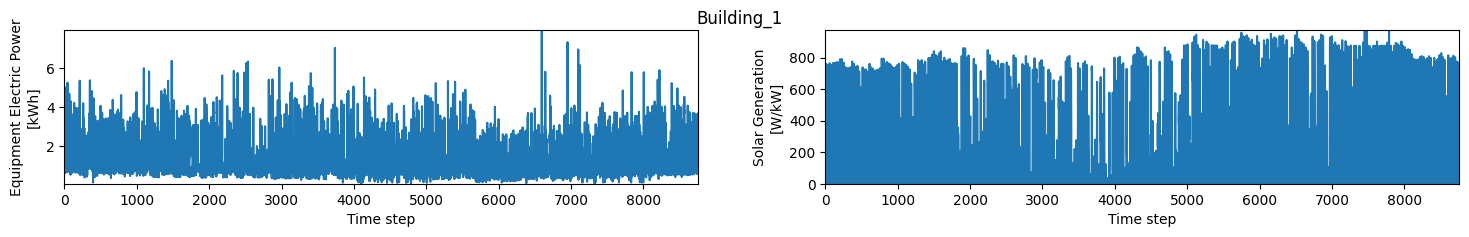

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(18, 2))
x = building_data.index
y1 = building_data['Equipment Electric Power [kWh]']
y2 = building_data['Solar Generation [W/kW]']
axs[0].plot(x, y1)
axs[0].set_xlabel('Time step')
axs[0].set_ylabel('Equipment Electric Power\n[kWh]')
axs[1].plot(x, y2)
axs[1].set_xlabel('Time step')
axs[1].set_ylabel('Solar Generation\n[W/kW]')
fig.suptitle(building_name)
plt.show()

### Preview Weather File

Other supplemental data in the dataset include TMY3 weather data from the Los Angeles International Airport weather station and carbon intensity (kg<sub>CO<sub>2</sub></sub>/kWh) time-series. All buildings in this dataset reference the same weather file. We will preview this dataset like we did for Building_1's data:

In [11]:
weather_filename = schema['buildings'][building_name]['weather']
filepath = os.path.join(root_path, weather_filename)
weather_data = pd.read_csv(filepath)
display(weather_data.head())

,Outdoor Drybulb Temperature [C],Relative Humidity [%],Diffuse Solar Radiation [W/m2],Direct Solar Radiation [W/m2],6h Prediction Outdoor Drybulb Temperature [C],12h Prediction Outdoor Drybulb Temperature [C],24h Prediction Outdoor Drybulb Temperature [C],6h Prediction Relative Humidity [%],12h Prediction Relative Humidity [%],24h Prediction Relative Humidity [%],6h Prediction Diffuse Solar Radiation [W/m2],12h Prediction Diffuse Solar Radiation [W/m2],24h Prediction Diffuse Solar Radiation [W/m2],6h Prediction Direct Solar Radiation [W/m2],12h Prediction Direct Solar Radiation [W/m2],24h Prediction Direct Solar Radiation [W/m2]
0,20.0,84.0,0.0,0.0,18.3,22.8,20.0,81.0,68.0,81.0,25.0,964.0,0.0,100.0,815.0,0.0
1,20.1,79.0,0.0,0.0,19.4,22.8,19.4,79.0,71.0,87.0,201.0,966.0,0.0,444.0,747.0,0.0
2,19.7,78.0,0.0,0.0,21.1,22.2,19.4,73.0,73.0,87.0,420.0,683.0,0.0,592.0,291.0,0.0
3,19.3,78.0,0.0,0.0,22.2,22.8,19.4,71.0,71.0,90.0,554.0,522.0,0.0,491.0,153.0,0.0
4,18.9,78.0,0.0,0.0,21.7,22.2,18.9,73.0,71.0,90.0,778.0,444.0,0.0,734.0,174.0,0.0


The weather file has fields that describe the outdoor dry-bulb temperature, relative humidity, diffuse and direct solar radiation, as well as their 6 hour, 12 hour and 24 hour forecasts. In this dataset, the forecasts are perfect forecasts for example, the 6 hour of outdoor dry-bulb temperature at a certain time step is the exact temperature value 6 hours later. The summary statistics for these fields are provided below:

In [12]:
display(weather_data.describe(include='all'))

,Outdoor Drybulb Temperature [C],Relative Humidity [%],Diffuse Solar Radiation [W/m2],Direct Solar Radiation [W/m2],6h Prediction Outdoor Drybulb Temperature [C],12h Prediction Outdoor Drybulb Temperature [C],24h Prediction Outdoor Drybulb Temperature [C],6h Prediction Relative Humidity [%],12h Prediction Relative Humidity [%],24h Prediction Relative Humidity [%],6h Prediction Diffuse Solar Radiation [W/m2],12h Prediction Diffuse Solar Radiation [W/m2],24h Prediction Diffuse Solar Radiation [W/m2],6h Prediction Direct Solar Radiation [W/m2],12h Prediction Direct Solar Radiation [W/m2],24h Prediction Direct Solar Radiation [W/m2]
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,16.837454,73.004224,208.282192,201.231507,16.837454,16.837454,16.837454,73.004224,73.004224,73.004224,208.282192,208.282192,208.282192,201.231507,201.231507,201.231507
std,3.564816,16.480251,292.799407,296.193301,3.564816,3.564816,3.564816,16.480251,16.480251,16.480251,292.799407,292.799407,292.799407,296.193301,296.193301,296.193301
min,5.600000,10.000000,0.000000,0.000000,5.600000,5.600000,5.600000,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.400000,65.000000,0.000000,0.000000,14.400000,14.400000,14.400000,65.000000,65.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17.200000,76.000000,10.000000,0.000000,17.200000,17.200000,17.200000,76.000000,76.000000,76.000000,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000
75%,19.400000,84.000000,382.000000,424.000000,19.400000,19.400000,19.400000,84.000000,84.000000,84.000000,382.000000,382.000000,382.000000,424.000000,424.000000,424.000000
max,32.200000,100.000000,1017.000000,953.000000,32.200000,32.200000,32.200000,100.000000,100.000000,100.000000,1017.000000,1017.000000,1017.000000,953.000000,953.000000,953.000000


We can also plot this weather data on an axes to understand it better:

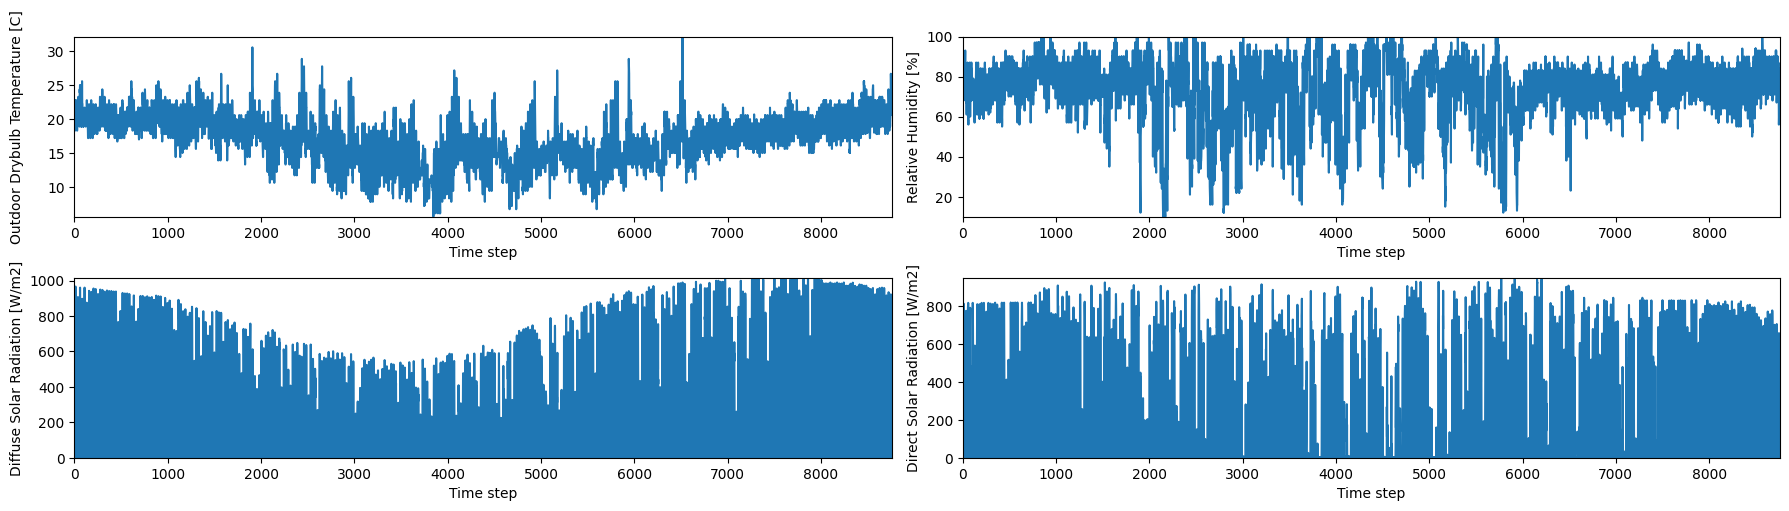

In [13]:
columns = ['Outdoor Drybulb Temperature [C]', 'Relative Humidity [%]', 'Diffuse Solar Radiation [W/m2]', 'Direct Solar Radiation [W/m2]']
fig, axs = plt.subplots(2, 2, figsize=(18, 5))
x = weather_data.index

for ax, c in zip(fig.axes, columns):
    y = weather_data[c]
    ax.plot(x, y)
    ax.set_xlabel('Time step')
    ax.set_ylabel(c)

fig.align_ylabels()
plt.tight_layout()
plt.show()

### Preview Electricity Price Data

The electricity rate-plan we utilize is that of the community's utility provider, [Southern California Edison](https://www.sce.com/residential/rates/Time-Of-Use-Residential-Rate-Plans). We adopt their TOU-D-PRIME rate plan summarized in table below, which is designed for customers with residential batteries where electricity is cheapest in the early morning and late night and cheaper during off-peak months of October-May. Meanwhile, electricity is cheaper on weekends for peak hours of 4 PM-9 PM.

Table: Time-Of-Use rate plan ($/kWh).
| | June-September |  | October-May |  |
|---|---|---|---|---|
| **Time** | **Weekday** | **Weekend** | **Weekday** | **Weekend** |
| 8 AM-4 PM | 0.21 | 0.21 | 0.20 | 0.20 |
| 4 PM-9 PM | 0.54 | 0.40 | 0.50 | 0.50 |
| 9 PM-8 AM | 0.21 | 0.21 | 0.20 | 0.20 |

The electricity pricing time series is shown below. It has four fields including perfect forecast of the pricing 6, 12 and 24 hours ahead.

In [14]:
pricing_filename = schema['buildings'][building_name]['pricing']
filepath = os.path.join(root_path, pricing_filename)
pricing_data = pd.read_csv(filepath)
display(pricing_data.head())

,Electricity Pricing [$],6h Prediction Electricity Pricing [$],12h Prediction Electricity Pricing [$],24h Prediction Electricity Pricing [$]
0,0.22,0.22,0.22,0.22
1,0.22,0.22,0.22,0.22
2,0.22,0.22,0.22,0.22
3,0.22,0.22,0.22,0.22
4,0.22,0.22,0.54,0.22


### Preview Carbon Intensity Data

Another supplementary data in the `citylearn_challenge_2022_phase_all` dataset is the grid carbon intensity time series descring the CO<sub>2</sub> equivalent of greenhouse gases that are emitted for every unit kWh of energy consumption. This time series is shown with its summary statistics below:

In [15]:
carbon_intensity_filename = schema['buildings'][building_name]['carbon_intensity']
filepath = os.path.join(root_path, carbon_intensity_filename)
carbon_intensity_data = pd.read_csv(filepath)
display(carbon_intensity_data.head())
display(carbon_intensity_data.describe(include='all').T)

,kg_CO2/kWh
0,0.170724
1,0.157319
2,0.154503
3,0.150945
4,0.151820


,count,mean,std,min,25%,50%,75%,max
kg_CO2/kWh,8760.0,0.156531,0.03537,0.070383,0.13108,0.154263,0.178429,0.281796


We also preview the carbon intensity time series on a pair of axes:

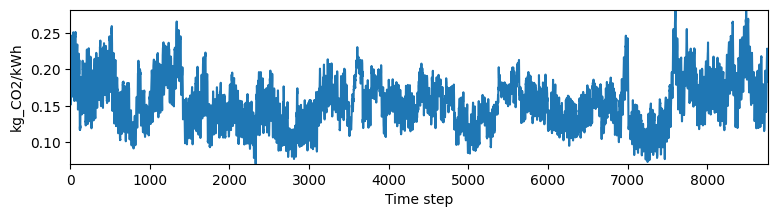

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(9, 2))
x = carbon_intensity_data.index
y = carbon_intensity_data['kg_CO2/kWh']
ax.plot(x, y)
ax.set_xlabel('Time step')
ax.set_ylabel('kg_CO2/kWh')
plt.show()

## Data Preprocessing
<!-- Additionally, you can include any data preprocessing steps and exploratory data analyses (e.g. visualize data distributions, impute missing values, etc.) in this section to allow the users to better understand the dataset. 

In this section, you might also want to describe the different input and output variables, the train/val/test splits, and any data transformations. -->

Now that we are familiar with the CityLearn `citylearn_challenge_2022_phase_all` dataset, we will now make some minor changes to its schema that will improve our learning experience in this tutorial. These changes are as follows:

1. We want to use a subset of the 17 buildings so that we are not overwhelmed by the amount of data to analyze during the tutorial 🙂. Since CityLearn is primarily designed for district level energy management and coordination we cannot use only 1 building. Instead we will use three buildings from the dataset.
2. We want to use only a one-week period from the entire one-year period in the dataset's files for this tutorial for the same reason of ease of analysis. We select this one-week period.
3. CityLearn allows for two control architectures: a one controller to one building setup (independent control) or a one controller to many buildings setup (centralized control). In this tutorial we will make use of the latter architecture.
4. Instead of using the full observation space (see the docs for a summary of CityLearn's [observations](https://www.citylearn.net/overview/observations.html) and [actions](https://www.citylearn.net/overview/actions.html)) which will take a while to explore and converge in RL implementations, we will narrow down the space to only one observations: hour. This is not the best set up because the hour alone does not explain the state transitions in the environment that the agent is observing, nevertheless, it will help highlight the strengths and weaknesses of different control algorithms.

We will make these modifications directly in the schema. To keep things interesting, the three buildings and one-week period will be pseudo-randomly selected but for reproducibility, we will set the random generator seed. This seed can be changed to any value to select another pseudorandom one-week period. Also, we will provide a function to set the observations we want to use in our simulations so that later down the line, it will be easy to switch and utilize other observations. We will define three functions to help us make these decisions:

In [17]:
def set_schema_buildings(schema: dict, building_count: int, seed: int):
    # set random seed
    np.random.seed(seed)

    # get all building names
    buildings = list(schema['buildings'].keys())

    # remove buildins 12 and 15 as they have pecularities in their data
    # that are not relevant to this tutorial
    buildings_to_exclude = ['Building_12', 'Building_15']

    for b in buildings_to_exclude:
        buildings.remove(b)

    # randomly select specified number of buildings
    buildings = np.random.choice(buildings, size=building_count, replace=False).tolist()

    # update schema to only included selected buildings
    for b in schema['buildings']:
        if b in buildings:
            schema['buildings'][b]['include'] = True
        else:
            schema['buildings'][b]['include'] = False

    return schema, buildings

def set_schema_simulation_period(schema: dict, day_count: int, seed: int):
    # set random seed
    np.random.seed(seed)

    # use any of the files to determine the total number of available time steps
    filename = schema['buildings'][building_name]['carbon_intensity']
    filepath = os.path.join(root_path, filename)
    time_steps = pd.read_csv(filepath).shape[0]

    # set candidate simulation start time steps spaced by the number of specified days
    simulation_start_time_step_list = np.arange(0, time_steps, 24*day_count)

    # randomly select a simulation start time step
    simulation_start_time_step = np.random.choice(simulation_start_time_step_list, size=1)[0]
    simulation_end_time_step = simulation_start_time_step + 24*day_count - 1

    # update schema simulation time steps
    schema['simulation_start_time_step'] = simulation_start_time_step
    schema['simulation_end_time_step'] = simulation_end_time_step

    return schema, simulation_start_time_step, simulation_end_time_step

def set_active_observations(schema: dict, active_observations: List[str]):
    active_count = 0
    valid_observations = list(schema['observations'].keys())
    observations = []

    for o in schema['observations']:
        if o in active_observations:
            schema['observations'][o]['active'] = True
            observations.append(o)
            active_count += 1
        else:
            schema['observations'][o]['active'] = False

    assert active_count > 0,\
        f'the provided observations are not valid observations. Valid observations in CityLearn are: {valid_observations}'
    
    return schema, observations

### Setting your Random Seed

Begin by setting a random seed. You can set the seed to your birth year, day, month or lucky number 😁. Choose wisely because we will use this random seed moving forward 😉?!?):

In [18]:
RANDOM_SEED = 0

### Setting the Buildings, Time Periods and Observations to use in Simulations from the Schema

Now we can pseudo-randomly select buildings and time periods as well as set the active observations we will use:

In [19]:

building_count = 2
day_count = 7
active_observations = ['hour']
schema, buildings = set_schema_buildings(schema, building_count, RANDOM_SEED)
schema, simulation_start_time_step, simulation_end_time_step = set_schema_simulation_period(schema, day_count, RANDOM_SEED)
schema, active_observations = set_active_observations(schema, active_observations)

print('Selected buildings:', buildings)
print(f'Selected {day_count} period time steps:', (simulation_start_time_step, simulation_end_time_step))
print(f'Active observations:', active_observations)

Selected buildings: ['Building_2', 'Building_7']
Selected 7 period time steps: (7392, 7559)
Active observations: ['hour']


Lastly, we set the `central_agent` key-value in the schema to `True` one controller to many buildings setup (centralized control): 

In [20]:
schema['central_agent'] = True

# Initialize a CityLearn Environment
***

We will now initialize an example instance of the CityLearn environment that we will use in this tutorial. To initialize an environment, all that needs to be done is call the `CityLearnEnv` `__init__` method and parse the `schema` to this method:

In [21]:
env = CityLearnEnv(schema)

The `env` has a number of properties and functions that can be learned about in the [docs](https://www.citylearn.net/api/citylearn.citylearn.html#citylearn.citylearn.CityLearnEnv). We will interact with some of its feature to learn about the current state of the environment:

In [22]:
print('Current time step:', env.time_step)
print('environment number of time steps:', env.time_steps)
print('environment uses central agent:', env.central_agent)
print('Common (shared) observations amogst buildings for when using central agent = False:', env.shared_observations)
print('Number of buildings:', len(env.buildings))

Current time step: 0
environment number of time steps: 168
environment uses central agent: True
Common (shared) observations amogst buildings for when using central agent = False: ['hour']
Number of buildings: 2


The buildings in the environment are objects of the `Building` class and the class properties and functions are detailed in the [docs](https://www.citylearn.net/api/citylearn.building.html#citylearn.building.Building). We will interact with some of these features:

In [23]:
# electrical storage
print('Electrical storage capacity:',{b.name: b.electrical_storage.capacity for b in env.buildings})
print('Electrical storage nominal power:',{b.name: b.electrical_storage.nominal_power for b in env.buildings})
print('Electrical storage capacity history:',{b.name: b.electrical_storage.capacity_history for b in env.buildings})
print('Electrical storage loss_coefficient:',{b.name: b.electrical_storage.loss_coefficient for b in env.buildings})
print('Electrical storage initial_soc:',{b.name: b.electrical_storage.initial_soc for b in env.buildings})
print('Electrical storage soc:',{b.name: b.electrical_storage.soc for b in env.buildings})
print('Electrical storage efficiency:',{b.name: b.electrical_storage.efficiency for b in env.buildings})
print('Electrical storage efficiency history:',{b.name: b.electrical_storage.efficiency_history for b in env.buildings})
print('Electrical storage electricity consumption:',{b.name: b.electrical_storage.electricity_consumption for b in env.buildings})
print('Electrical storage capacity loss coefficient:',{b.name: b.electrical_storage.loss_coefficient for b in env.buildings})
print()
# pv
print('PV nominal power:',{b.name: b.pv.nominal_power for b in env.buildings})
print()

# active observations and actions
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', None):
    print('Active observations:')
    display(pd.DataFrame([{**{'building':b.name}, **b.observation_metadata} for b in env.buildings]))
    print()
    print('Active actions:')
    display(pd.DataFrame([{**{'building':b.name}, **b.action_metadata} for b in env.buildings]))

Electrical storage capacity: {'Building_2': 6.4, 'Building_7': 6.4}
Electrical storage nominal power: {'Building_2': 5.0, 'Building_7': 5.0}
Electrical storage capacity history: {'Building_2': [6.4], 'Building_7': [6.4]}
Electrical storage loss_coefficient: {'Building_2': 0.0, 'Building_7': 0.0}
Electrical storage initial_soc: {'Building_2': 0, 'Building_7': 0}
Electrical storage soc: {'Building_2': [0], 'Building_7': [0]}
Electrical storage efficiency: {'Building_2': 0.9, 'Building_7': 0.9}
Electrical storage efficiency history: {'Building_2': [0.9], 'Building_7': [0.9]}
Electrical storage electricity consumption: {'Building_2': [0.0], 'Building_7': [0.0]}
Electrical storage capacity loss coefficient: {'Building_2': 0.0, 'Building_7': 0.0}

PV nominal power: {'Building_2': 4.0, 'Building_7': 4.0}

Active observations:


,building,hour
0,Building_2,True
1,Building_7,True



Active actions:


,building,electrical_storage
0,Building_2,True
1,Building_7,True


# Experiments
***

Now that the schema is set up to your preference and the environment initialized, let us go over the experiments that this tutorial covers.

Using the `citylearn_challenge_2022_phase_all` dataset, the control problem to be solved is to use batteries as a distributed energy resource (DER) through management of battery charge and discharge in each building in order to shift building loads from the grid to the battery. This way, the batteries provide flexibility in the district of buildings.

We will try out three types of control algorithms namely:
1. Rule-based control (RBC)
2. Tabular Q-Learning
3. Soft-Actor Critic (SAC) 

Tabular Q-Learning and SAC are both reinforcement learning (RL) algorithms where the difference between the two is that while in Tabular Q-Learning the Q values are updated through exhaustive exploration and exploitation of the environment, SAC uses a function approximator to estimate the Q-values this saves learning time.

By using these three control algorithms, we will highlight some of their strengths and weaknesses. We will evaluate their ability to solve the control problem using a set of seven key performance indicators (KPIs).

## Key Performance Indicators for Evaluation
We evaluate the control agents' performance on six KPIs that are to be minimized: electricity consumption, $D$; electricity price, $C$; carbon emissions, $G$; average daily peak, $P$; ramping, $R$ and (1 - Load Factor), ($1 - L$) for a total of $n$ time steps in an episode. $P$, $R$ and ($1 - L$) are grid-level KPIs that are calculated using the aggregated district-level hourly net electricity consumption (kWh), $E_h^{\textrm{district}}$. $E$, $C$, and $G$ are building-level KPIs that are calculated using the building-level hourly net electricity consumption (kWh), $E_h^{\textrm{building}}$, and are reported at the grid level as the average of the building-level values.

Electricity consumption, $D$, is defined as the sum of only non-negative $E_h^{\textrm{building}}$ as the objective is to minimize the energy consumed but not profit from the excess generation.

$
    D = \sum_{h=0}^{n-1}{\textrm{max} \left (0,E_h^{\textrm{building}} \right)}
$

Electricity price, $C$, is defined as the sum of non-negative building-level net electricity price, $E_h^{\textrm{building}} \times T_h$ (\$), where $T_h$ is the electricity rate at hour $h$.

$
    C = \sum_{h=0}^{n-1}{\textrm{max} \left (0,E_h^{\textrm{building}} \times T_h \right )}
$

Carbon emissions, $G$, is defined in \cref{eqn:kpi-carbon_emissions} as the sum of building-level carbon emissions (kg<sub>CO<sub>2</sub>e</sub>), $E_h^{\textrm{building}} \times O_h$, where $O_h$ is the carbon intensity (kg<sub>CO<sub>2</sub>e</sub>/kWh) at hour $h$.

$
    G = \sum_{h=0}^{n-1}{\textrm{max} \left (0,E_h^{\textrm{building}} \times O_h \right )}
$

<!-- Zero net energy, $Z$, is defined in \cref{eqn:kpi-zero_net_energy} as the sum of both negative and positive values of $E_h^{\textrm{building}}$.

$
    Z = \sum_{h=0}^{n-1}E_h^{\textrm{building}}
$ -->

Average daily peak, $P$, is defined as the mean of the daily maximum $E_h^{\textrm{district}}$ where $d$ is the day of year index.

$
    P = \frac{
        {\sum}_{d=0}^{364} {\sum}_{h=0}^{23} {\textrm{max} \left (E_{24d + h}^{\textrm{district}}, \dots, E_{24d + 23}^{\textrm{district}} \right)}
    }{365}
$

Ramping, $R$ is defined as the absolute difference of consecutive $E_h^{\textrm{district}}$. It represents the smoothness of the district’s load profile where low $R$ means there is gradual increase in grid load even after self-generation becomes unavailable in the evening and early morning. High $R$ means abrupt change in grid load that may lead to unscheduled strain on grid infrastructure and blackouts as a result of supply deficit.

$
    R = \sum_{h=0}^{n-1}  \lvert E_{h}^{\textrm{district}} - E_{h - 1}^{\textrm{district}} \rvert
$

Load factor, $L$ is defined as the average ratio of monthly average and peak $E_{h}^{\textrm{district}}$ where $m$ is the month index. $L$ is the efficiency of electricity consumption and is bounded between 0 (very inefficient) and 1 (highly efficient) thus, the goal is to maximize $L$ or minimize $1 - L$.

$
    1 - L = (
        \sum_{m=0}^{11} 1 - \frac{
            \left (
                \sum_{h=0}^{729} E_{730m + h}^{\textrm{district}}
            \right ) \div 730
        }{
            \textrm{max} \left (E_{730m}^{\textrm{district}}, \dots, E_{730m + 729}^{\textrm{district}} \right )
    }) \div 12
$

For the remainder of the paper, the KPIs are reported as normalized values with respect to the baseline outcome (\cref{eqn:kpi-normalization}) where the baseline outcome is when buildings are not equipped with batteries i.e., no control.

$
    \textrm{KPI} = \frac{{\textrm{KPI}_{control}}}{\textrm{KPI}_{baseline (no\ battery)}}
$

## Convenience Functions for Plotting Simulation Results

CityLearn itself is able to report these KPIs during simulation however, let us go ahead and define some convenience functions to help us report the KPIs illustratively. The first function helps us calculate and return the KPIs in a table:

In [24]:
def get_kpis(env: CityLearnEnv):
    kpi_names = [
        'electricity_consumption', 'pricing', 'carbon_emissions', 
        'average_daily_peak', 'ramping', '1 - load_factor'
    ]
    kpis = env.evaluate()
    kpis['value'] = kpis['value'].round(3)
    kpis = kpis[
        (kpis['cost_function'].isin(kpi_names))
    ].dropna()
    kpis = kpis.rename(columns={'cost_function': 'kpi'})

    return kpis

The next function, `plot_building_kpis` plots the KPIs at the building level in a heat map and can be used to compare different control strategies by providing it with a dictionary that maps control strategy names the environment the strategy was simulated on:

In [25]:
def plot_building_kpis(envs: Mapping[str, CityLearnEnv]):
    kpis_list = []

    for k, v in envs.items():
        kpis = get_kpis(v)
        kpis = kpis[kpis['level']=='building'].copy()
        kpis['building_id'] = kpis['name'].str.split('_', expand=True)[1].astype(int)
        kpis['env_id'] = k
        kpis_list.append(kpis)

    kpis = pd.concat(kpis_list, ignore_index=True, sort=False)
    baseline_kpis = kpis.copy()
    baseline_kpis['env_id'] = 'Baseline'
    baseline_kpis['value'] = 1.0
    baseline_kpis = baseline_kpis.drop_duplicates()
    kpis = pd.concat([kpis, baseline_kpis], ignore_index=True, sort=False)
    kpi_names= kpis['kpi'].unique()
    column_count_limit = 3
    row_count = math.ceil(len(kpi_names)/column_count_limit)
    column_count = min(column_count_limit, len(kpi_names))
    building_count = len(kpis['name'].unique())
    env_count = len(envs)
    cmap = 'coolwarm'
    vcenter = 1.0
    vmin = kpis['value'].min()
    vmax = kpis['value'].max()
    vmin = vmin if vmin < vcenter else 0.99
    vmax = vmax if vmax > vcenter else 1.01
    divnorm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
    figsize = (1.0*building_count*column_count, 0.5*env_count*row_count)
    fig, _ = plt.subplots(row_count, column_count, figsize=figsize, gridspec_kw={'hspace': 1.5, 'wspace': 0.5})

    for i, (ax, (k, k_data)) in enumerate(zip(fig.axes, kpis.groupby('kpi'))):
        k_data = k_data.pivot(index='env_id', columns='building_id', values='value')
        x, y, z = k_data.columns.astype(int).astype(str), k_data.index, k_data.values
        pcm = ax.pcolormesh(x, y, z, shading='nearest', cmap=cmap, norm=divnorm, edgecolors='black', linewidth=0.0)
        ax.tick_params('x', which='both', rotation=0)
        ax.set_xlabel('Building ID') 
        ax.set_ylabel(None)
        ax.set_title(k)

        for (i, j), z in np.ndenumerate(k_data):
            color = 'black'
            ax.text(j, i, z, ha='center', va='center', color=color)
    
    fig.suptitle('Building-level KPIs', y=1.8)
    return fig

The `plot_district_kpis` function plots the KPIs at the district level in a bar chart and can be used to compare different control strategies:

In [26]:
def plot_district_kpis(envs: Mapping[str, CityLearnEnv]):
    kpis_list = []

    for k, v in envs.items():
        kpis = get_kpis(v)
        kpis = kpis[kpis['level']=='district'].copy()
        kpis['env_id'] = k
        kpis_list.append(kpis)

    kpis = pd.concat(kpis_list, ignore_index=True, sort=False)
    row_count = 1
    column_count = 1
    env_count = len(envs)
    kpi_count = len(kpis['kpi'].unique())
    figsize = (2.0*column_count, 0.25*env_count*kpi_count*row_count)
    fig, ax = plt.subplots(row_count, column_count, figsize=figsize)
    sns.barplot(x='value', y='kpi', data=kpis, hue='env_id', ax=ax)
    ax.axvline(1.0, color='black', linestyle='--', label='Baseline')
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_title('District-level KPIs')

    for s in ['right','top']:
        ax.spines[s].set_visible(False)

    for p in ax.patches:
        ax.text(p.get_x() + p.get_width(), p.get_y() + p.get_height()/2.0, p.get_width(), ha='left', va='center')

    ax.legend(bbox_to_anchor=(1.2, 1.0), loc='upper left', framealpha=0, ncol=1)
    
    return fig

The `plot_building_load_profiles` function plots the building-level net electricity consumption profiles for the baseline (no battery) and control scenario with battery. It can also be used to compare different control strategies.

In [27]:
def plot_building_load_profiles(envs: Mapping[str, CityLearnEnv]):
    building_count = len(list(envs.values())[0].buildings)
    column_count_limit = 4
    row_count = math.ceil(building_count/column_count_limit)
    column_count = min(column_count_limit, building_count)
    figsize = (6.0*column_count, 1.0*row_count)
    fig, _ = plt.subplots(row_count, column_count, figsize=figsize, gridspec_kw={'hspace': 1.5, 'wspace': 0.17})

    for i, ax in enumerate(fig.axes):
        for k, v in envs.items():
            y = v.buildings[i].net_electricity_consumption
            x = range(len(y))
            ax.plot(x, y, label=k)

        y = v.buildings[i].net_electricity_consumption_without_storage
        ax.plot(x, y, label='Baseline')
        ax.set_title(v.buildings[i].name)
        ax.set_xlabel('Time step')
        ax.set_ylabel('kWh')
        ax.xaxis.set_major_locator(ticker.MultipleLocator(24))
        ax.legend()

    fig.suptitle('Building-level net electricity consumption', y=1.35)
    
    return fig

The `plot_district_load_profiles` function plots the district-level net electricity consumption profiles for the baseline (no battery) and control scenario with battery. It can also be used to compare different control strategies.

In [28]:
def plot_district_load_profiles(envs: Mapping[str, CityLearnEnv]):
    figsize = (6.0, 1.0)
    fig, ax = plt.subplots(1, 1, figsize=figsize, gridspec_kw={'hspace': 1.5, 'wspace': 0.17})

    for k, v in envs.items():
        y = v.net_electricity_consumption
        x = range(len(y))
        ax.plot(x, y, label=k)
    
    y = v.net_electricity_consumption_without_storage
    ax.plot(x, y, label='Baseline')
    ax.set_title('District-level net electricity consumption')
    ax.set_xlabel('Time step')
    ax.set_ylabel('kWh')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(24))
    ax.legend()
    
    return fig

The `plot_battery_soc_profiles` function plots the building-level battery state of charge (SoC) profiles can also be used to compare different control strategies.

In [29]:
def plot_battery_soc_profiles(envs: Mapping[str, CityLearnEnv]):
    building_count = len(list(envs.values())[0].buildings)
    column_count_limit = 4
    row_count = math.ceil(building_count/column_count_limit)
    column_count = min(column_count_limit, building_count)
    figsize = (6.0*column_count, 1.0*row_count)
    fig, _ = plt.subplots(row_count, column_count, figsize=figsize, gridspec_kw={'hspace': 1.5, 'wspace': 0.17})

    for i, ax in enumerate(fig.axes):
        for k, v in envs.items():
            y = np.array(v.buildings[i].electrical_storage.soc)/v.buildings[i].electrical_storage.capacity_history[0]
            x = range(len(y))
            ax.plot(x, y, label=k)

        ax.set_title(v.buildings[i].name)
        ax.set_xlabel('Time step')
        ax.set_ylabel('SoC')
        ax.xaxis.set_major_locator(ticker.MultipleLocator(24))
        ax.legend()

    fig.suptitle('Battery SoC', y=1.35)
    
    return fig

The last function, `plot_simulation_summary` is a convenience function used to plot all the other figures.

In [30]:
def plot_simulation_summary(envs: Mapping[str, CityLearnEnv]):
    _ = plot_building_kpis(envs)
    plt.show()
    _ = plot_building_load_profiles(envs)
    plt.show()
    _ = plot_battery_soc_profiles(envs)
    plt.show()
    _ = plot_district_kpis(envs)
    plt.show()
    _ = plot_district_load_profiles(envs)
    plt.show()

## Build your Custom Rule-Based Controller
We will start simple with a rule-based controller (RBC) which you will build yourself. RBC is a popular control strategy that is used in most systems e.g. HVAC, batteries, etc given their level of simplicity. They are  best defined as a set of rules expressed as if-else statements and conditions that guide their decision making. An example of such statement is "if outdoor dry-bulb temperature is < 20<sup>o</sup>C and hour 10 PM, charge battery with 5% of capacity". Now the actual implementation of this statement is open-ended as a designer can choose to program it using any programming language e.g. Python or a proprietary language that the battery manufacturer uses nevertheless, at a high-level, it simplifies to a set of statements and conditions that are easily understood and mappable.

The RBC you will be designing here, is a set of if-else statements that use the hour-of-day to determine the amount of energy to charge or discharge a battery. Remember we are using a one controller to many buildings set up thus, the if-else statements we define will apply to all batteries in all buildings.

We will use widgets to make the tuning of your custom RBC interactive. We will design a custom RBC that inherits from an existing RBC in CityLearn called the `HourRBC` (see the [docs](https://www.citylearn.net/api/citylearn.agents.rbc.html#citylearn.agents.rbc.HourRBC) to view the source code). Inheritance, allows us to copy existing functions and variables in the parent class, `HourRBC`, into our custom class. The `HourRBC` class allows one to define a custom action map using the hour-of-day as the the if condition and the battery capacity proportion as the action where negative proportions imply discharging and positive proportions imply charging.

We begin by initializing the environment we will work with:

In [31]:
rbc_env = CityLearnEnv(schema)

Now let us define the custom RBC class we will use. We want to include a loader variable to help us visualize the simulation progress. The loader is an `IntProgress` ipywidgets object. We will update the loader's value each time the `next_time_step` function is called in the RBC class.

In [32]:
class CustomRBC(HourRBC):
   def __init__(self, env: CityLearnEnv, action_map: Mapping[int, float] = None, loader: IntProgress = None):
      super().__init__(env=env, action_map=action_map) 
      self.loader = loader

   def next_time_step(self):
      super().next_time_step()

      if self.loader is not None:
         self.loader.value += 1
      else:
         pass

We can now initialize the RBC by setting all actions to 0 for every hour:

In [33]:
action_map = {i: 0.0 for i in range(1, 25)}
rbc_model = CustomRBC(env=rbc_env, action_map=action_map)

With our custom RBC now defined, we can set up the interactive widgets.

> ⚠️ **NOTE**:
> You do not need to understand the content of the next code cell where the widget is defined. Instead wait for the widgets to load and interact with it using the instructions.

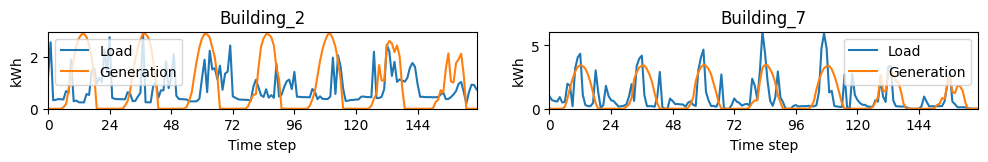

HTML(value='\n<h1>Custom RBC Tuner</h1>\n<p>Use this interactive widget to tune your custom RBC!\nReference th…

IntProgress(value=0, description='Waiting', max=10, style=ProgressStyle(bar_color='maroon'))

In [34]:
action_step = 0.05
hour_step = 2
hours = list(range(1, 25, hour_step))
default_loader_description = 'Waiting'
questions = """
<h1>Custom RBC Tuner</h1>
<p>Use this interactive widget to tune your custom RBC!
Reference the building load profiles above and the questions below when 
deciding on how to charge/discharge your rule-based controlled batteries.</p>

<h3>Some considerations when tuning your custom RBC:</h3>
<ul>
    <li>What happens when actions for all hours are set to 0?</li>
    <li>How can we set the RBC so that it takes advantage of solar generation?</li>
    <li>What settings work best for a specific building?</li>
    <li>What settings work best for the entire district?</li>
    <li>Can you tune the RBC to target improvements in any one of the evaluation KPIs?</li>
    <li>What challenges can you identify from this RBC tuning process?</li>
</ul>

<h3>Interact with the controls to tune your RBC:</h3>

<p>Use the sliders to set the hourly charge and discharge rate of the batteries.</p>
"""
html_ui = HTML(value=questions, placeholder='Questions')
sliders = [FloatSlider(
    value=0.0,
    min=-1.0,
    max=1.0,
    step=action_step,
    description=f'Hr: {h}-{h + hour_step - 1}',
    disabled=False,
    continuous_update=False,
    orientation='vertical',
    readout=True,
    readout_format='.2f',
) for h in hours]
reset_button = Button(description='Reset', disabled=False, button_style='info', tooltip='Set all hour actions to 0.0', icon='')
random_button = Button(description='Random', disabled=False, button_style='warning', tooltip='Select random hour actions', icon='')
simulate_button = Button(description='Simulate', disabled=False, button_style='success', tooltip='Run simulation', icon='check')
loader = IntProgress(value=0, min=0, max=10, description=default_loader_description, bar_style='', style={'bar_color': 'maroon'},orientation='horizontal')
sliders_ui = HBox(sliders)
buttons_ui = HBox([reset_button, random_button, simulate_button])

# run simulation so that the environment has results
# even if user does not interact with widgets
sac_episodes = 1
rbc_model.learn(episodes=sac_episodes)

def plot_building_guide(env):
    column_count_limit = 4
    building_count = len(env.buildings)
    row_count = math.ceil(building_count/column_count_limit)
    column_count = min(column_count_limit, building_count)
    figsize = (6.0*column_count, 1.0*row_count)
    fig, _ = plt.subplots(row_count, column_count, figsize=figsize, gridspec_kw={'hspace': 1.5, 'wspace': 0.17})

    for i, (ax, b) in enumerate(zip(fig.axes, env.buildings)):
        y1 = b.energy_simulation.non_shiftable_load
        y2 = b.pv.get_generation(b.energy_simulation.solar_generation)
        x = range(len(y1))
        ax.plot(x, y1, label='Load')
        ax.plot(x, y2, label='Generation')
        ax.set_title(b.name)
        ax.set_xlabel('Time step')
        ax.set_ylabel('kWh')
        ax.xaxis.set_major_locator(ticker.MultipleLocator(24))
        ax.legend()

    return fig

def on_reset_button_clicked(b):
    loader.value = 0
    loader.description = default_loader_description

    for s in sliders:
        s.value = 0.0

def on_random_button_clicked(b):
    loader.value = 0
    loader.description = default_loader_description
    options = np.arange(-1.0, 1.0, action_step)

    for s in sliders:
        s.value = round(random.choice(options), 2)

def on_simulate_button_clicked(b):
    loader.description = 'Simulating'
    loader.value = 0
    clear_output(wait=False)

    # plot building profiles
    _ = plot_building_guide(rbc_env)
    plt.show()
    
    display(html_ui, sliders_ui, buttons_ui, loader)
    reset_button.disabled = True
    random_button.disabled = True
    simulate_button.disabled = True

    for s in sliders:
        s.disabled = True

    action_map = {}

    for h, s in zip(hours, sliders):
        for i in range(hour_step):
            action_map[h + i] = s.value
    
    loader.max = rbc_env.time_steps*sac_episodes
    rbc_model.action_map = action_map
    rbc_model.learn(episodes=sac_episodes)

    loader.description = 'Finished'
    plot_simulation_summary({'RBC': rbc_env})
    
    reset_button.disabled = False
    random_button.disabled = False
    simulate_button.disabled = False

    for s in sliders:
        s.disabled = False

reset_button.on_click(on_reset_button_clicked)
random_button.on_click(on_random_button_clicked)
simulate_button.on_click(on_simulate_button_clicked)

# plot building profiles
_ = plot_building_guide(rbc_env)
plt.show()

# preview of building load profile
display(html_ui, sliders_ui, buttons_ui, loader)

## An Introduction to Tabular Q-Learning Algorithm as an Adaptive Controller
Tuning your RBC must have revealed that it is a cumbersome and labor intensive process, especially as the number of buildings, time period and variance in load profiles increase. What we will be ideal is an adaptive controller that can adjust to different occupant preferences and behaviors in each building that influence load profiles and adjust to different weather conditions that affect the temporal seasonal variance in load profiles.

Moreover, we want a controller that is able to learn with little to no knowledge about the environment model it is controlling unlike the RBC tuning process where you probably chose your charge and discharge proportion by visually inspecting the building load and generation profiles. Instead, we want a controller that can learn those patterns in a data-driven fashion.

### Q-Learning Background
[Tabular Q-Learning](https://link.springer.com/article/10.1007/BF00992698#citeas) is the most widely used model-free reinforcement learning technique due to its simplicity. In simple tasks with small finite state sets, and discrete actions, all transitions can be represented using a table, hence the name Tabular Q-Learning, which stores the state-action values, i.e., Q-values.

After taking an action $a$, given a state $s$, and observing the immediate reward $r$ for taking $a$ at $s$, learning is achieved through updating $Q(s, a)$ ([Bellman equation](https://en.wikipedia.org/wiki/Bellman_equation)) as:

$
Q(s, a) = Q(s, a) + \alpha [r + \gamma \max_{a'} Q(s', a') - Q(s, a)]
$

where $Q(s, a)$ is the Q-value for taking action $a$ in state $s$, $\alpha ∈ [0, 1]$ is the learning rate, which explicitly defines to what degree new knowledge overrides old knowledge: for $\alpha = 0$, no learning happens, while for $\alpha = 1$, all prior knowledge is lost. $\gamma$ is the discount factor which allow to balance between an agent that considers only immediate rewards ($\gamma$ = 0) and one that strives towards long term rewards ($\gamma$ = 1). $\max_{a'} Q(s', a')$ is the maximum Q-value for all actions $a'$ in the next state $s'$ and $s'$ is the next state reached after taking action $a$ in state $s$.

In other words, the optimal policy, $\pi$, results from taking those actions a that maximize the respective Q-values in each state. In order for the algorithm to converge to the optimal policy, the requirement is that each state-action pair $(s, a)$ be visited infinitely many times, such that the Q-values have converged.

The general algorithm for Q-Learning is:

> 1. Initialize the Q-table for all state-action pairs.
> 2. Set the learning rate $\alpha$ (0 < alpha < 1) and the discount factor $\gamma$ (0 < gamma < 1).
> 3. Repeat the following steps for each episode:
>     - Observe the initial state $s$.
>     - Choose an action $a$ based on the epsilon-greedy policy (a random action is chosen with probability epsilon, and the action with the highest Q-value is chosen with probability 1-epsilon).
>     - Take the action $a$ and observe the next state $s'$ and the reward $r$.
>     - Update the Q-value of the state-action pair $(s,a)$ using the Bellman equation.
>     - Set $s = s'$.
> 4. Repeat step 3 for a large number of episodes or until convergence is reached.

In Q-learning, the process of accumulating knowledge happens through the trade-off between exploiting known, high-reward, actions, and exploring other, unknown, actions that have not been executed yet under that state. The $\epsilon$-greedy approach which we use here, selects a random action with probability epsilon, $\epsilon$ (exploration), and the action with the highest expected return with probability $1 - \epsilon$ (exploitation). This balancing allows the agent to avoid local minima (exploration), while striving towards convergence (exploitation). In practice, $\epsilon$ is set relatively large in the beginning of the learning process, and then reduced progressively. The choice of the initial value and the reduction strategy is domain specific and task of the designer.

### CityLearn Tabular Q-Learning Implementation

CityLearn implements a tabular Q-learning algorithm in its `TabularQLearning` agent class (see [docs](https://www.citylearn.net/api/citylearn.agents.base.html#citylearn.agents.q_learning.TabularQLearning) for implementation). This Q-Learning implementation is inspired by the [BOPTEST Tutorial](https://colab.research.google.com/drive/1WeA_3PQeySba0MMRRte_oZTF7ptlP_Ra#scrollTo=9U81QUVcUfoW&line=17&uniqifier=1) but is the general algorithm in the literature that we have described. However, a caveat of making use of this agent is that it requires discrete observations and actions in order to update the Q-Table whereas the default CityLearn environment provides continuous observations and actions.

Nevertheless, CityLearn provides an environment wrapper, `TabularQLearningWrapper` (see [docs](https://www.citylearn.net/api/citylearn.wrappers.html#citylearn.wrappers.DiscreteSpaceWrapper)) to discretize observations and actions before passing to an agent. All we need to do is define the number of bins to use to discretize the observations and actions using the wrappers `observation_bin_sizes` and `action_bin_sizes` initialization variables.

We begin by initializing an environment:

In [35]:
tql_env = CityLearnEnv(schema)

We will discretize the hour into 24 bins and the action into 12 bins. Hour is an observation shared by all buildings thus, its values are the same in all buildings at each time step:

In [36]:
# define active observations and actions and their bin sizes
observation_bins = {'hour': 24}
action_bins = {'electrical_storage': 12}

# initialize list of bin sizes where each building 
# has a dictionary in the list definining its bin sizes
observation_bin_sizes = []
action_bin_sizes = []

for b in tql_env.buildings:
    # add a bin size definition for the buildings
    observation_bin_sizes.append(observation_bins)
    action_bin_sizes.append(action_bins)

Can you think of a way to choose more appropriate bin sizes? How do the choice of bin size and consequent action and observation spaces affect the learning process?

Now we wrap the environment to make sure we are exchanging discrete observations and actions between the environment and agent:

In [37]:
tql_env = TabularQLearningWrapper(
    tql_env.unwrapped,
    observation_bin_sizes=observation_bin_sizes, 
    action_bin_sizes=action_bin_sizes
)

We can now go ahead to initialize our Q Learner. We will modify the CityLearn `TabularQLearning` class so that we are able to visually track the learning process as well as keep tabs on its convergence as training episode go by. Specifically, we want to print how many time steps are left in the training and the cummulative reward after each episode. The modification is done below:

In [38]:
class CustomTabularQLearning(TabularQLearning):
    def __init__(self, env: CityLearnEnv, loader: IntProgress, random_seed: int = None):
        super().__init__(env=env, random_seed=random_seed)
        self.loader = loader
        self.reward_history = []
    
    def next_time_step(self):
        if self.env.time_step == 0:
            self.reward_history.append(0)

        else:
            self.reward_history[-1] += sum(self.env.rewards[-1])
            
        self.loader.value += 1
        super().next_time_step()

With our Tabular Q-Learning agent set up, it is time to train it on our environment. We will use the default hyperparameters (see [docs](https://www.citylearn.net/api/citylearn.agents.base.html#citylearn.agents.q_learning.TabularQLearning)) and train for $\frac{m \times n \times i}{t}$ episodes where $m$ and $n$ are the observation and action space sizes respectively, $i$ is an arbitrary integer and t is the number of time steps in one episode. That way, we increase the probability that we at least visit each state-action combination once.

Table dimension: (24, 144)
Number of episodes to train: 1028


IntProgress(value=0, description=' Simulating:', max=172704, style=ProgressStyle(bar_color='maroon'))

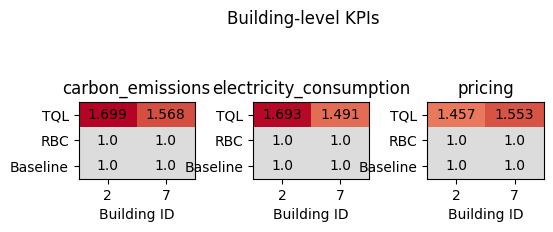

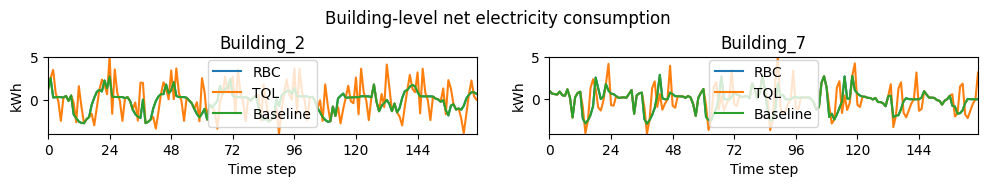

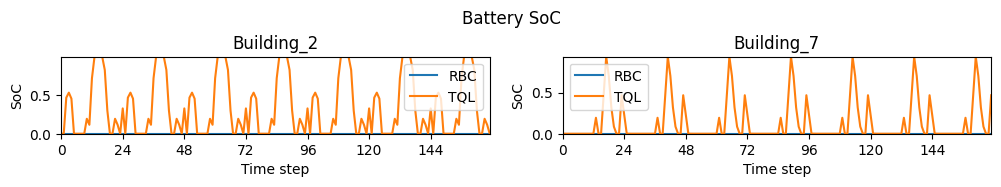

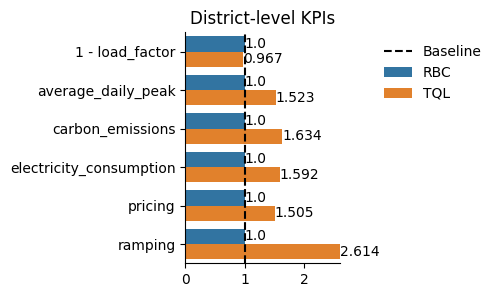

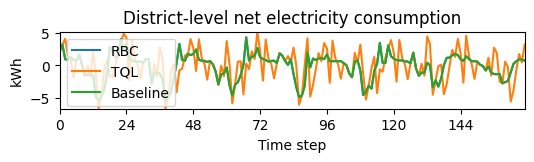

In [39]:
# calculate number of episodes
i = 50
action_space_size = tql_env.action_space[0].n
observation_space_size = tql_env.observation_space[0].n
tql_episodes = observation_space_size*action_space_size*i/tql_env.time_steps
tql_episodes = int(tql_episodes)
print('Table dimension:', (observation_space_size, action_space_size))
print('Number of episodes to train:', tql_episodes)

# loader to track progress
loader = IntProgress(
    value=0, min=0, max=tql_episodes*tql_env.time_steps, bar_style='', 
    style={'bar_color': 'maroon'}, description=' Simulating:', orientation='horizontal'
)
display(loader)

# Initialize model, train and evaluate deterministically
tql_model = CustomTabularQLearning(env=tql_env, loader=loader, random_seed=RANDOM_SEED)
tql_model.learn(episodes=tql_episodes + 1, deterministic_finish=True)

# plot summary and compare with other control results
plot_simulation_summary({'RBC': rbc_env, 'TQL': tql_env})

The figures plotted for the Tabular Q-Learning are compared against the baseline and your tuned RBC. We see that ...

Since the Q-Table is 2 dimensional, we can visualize and spot the the state-action combinations that maximize the Q-value below:

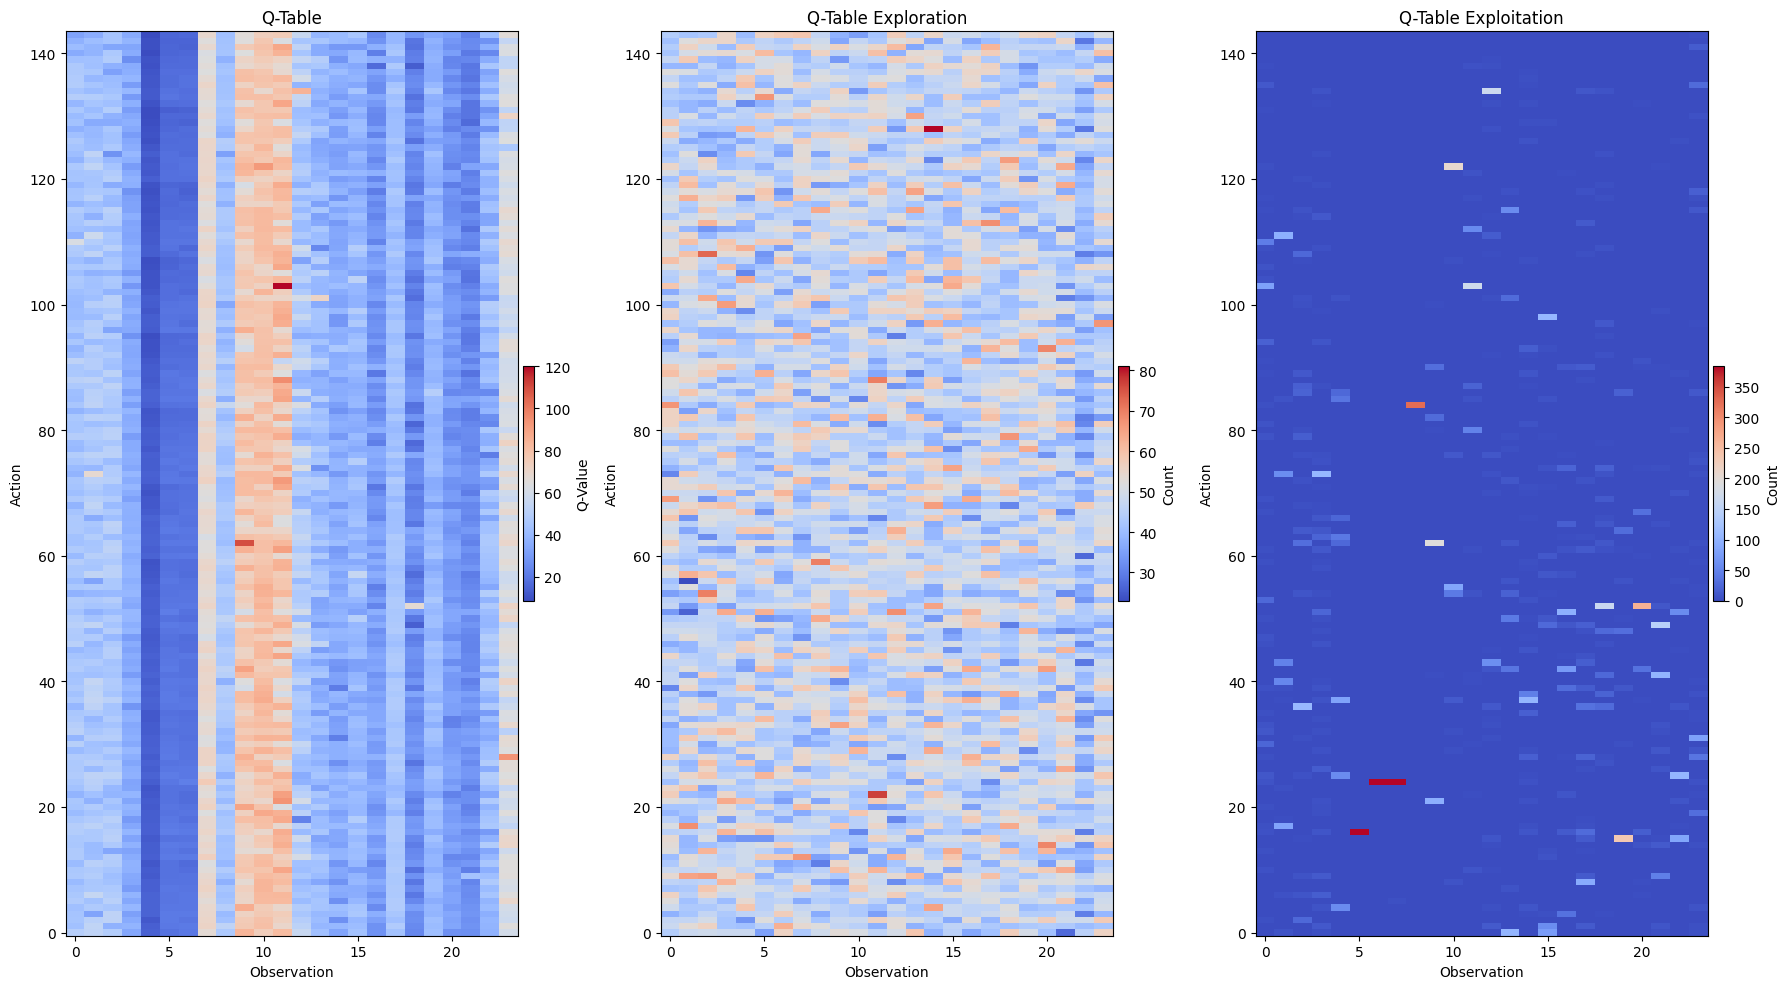

In [63]:
cmap = 'coolwarm'
figsize = (18, 10)
fig, axs = plt.subplots(1, 3, figsize=figsize)

def plot_q(ax: plt.axes, q: np.ndarray, title: str, label: str):
    x, y, z = list(range(q.shape[0])), list(range(q.shape[1])), q.T
    pcm = ax.pcolormesh(x, y, z, shading='nearest', cmap=cmap, edgecolors='black', linewidth=0.0)
    _ = fig.colorbar(pcm, ax=ax, orientation='vertical', label=label, fraction=0.025, pad=0.01)
    ax.set_xlabel('Observation') 
    ax.set_ylabel('Action')
    ax.set_title(title)
    
    return ax

axs[0] = plot_q(axs[0], tql_model.q[0], 'Q-Table', 'Q-Value')
axs[1] = plot_q(axs[1], tql_model.q_exploration[0], 'Q-Table Exploration', 'Count')
axs[2] = plot_q(axs[2], tql_model.q_exploitation[0], 'Q-Table Exploitation', 'Count')

plt.tight_layout()
plt.show()

<!-- Notice that the Q-Table values are negative and clipped at a maximum of 0. Are you able to figure out why that is? Refer to the Bellman equation and think about the implication of negative Q-Values on exploitation i.e. taking the best action at each state. -->

Now that we have experimented with the Tabular Q-Learning algorithm, what issues can you identify with this control approach? Ponder on these questions:

1. How do the observations we use affect learning?
2. How does the table dimension affect learning?
4. What can we do to ensure that there is enough exploration of all state-action pairs?
5. What issues can you identify with Tabular Q-Learning?
6. In what building control applications/examples does Tabular Q-Learning work well?
7. In what building applications/examples does Tabular Q-Learning fail?

### Replacing the Q-Table with a Function Approximator

Tabular Q-Learning is affected by the curse of dimensionality: as the size of the state space increases due to, e.g., continuous sensor inputs, the size of the Q-table has to necessarily increase is well. In particular for building control, the curse of dimensionality is significant, considering the potentially large number of sensors measuring various quantities (temperature, humidity, energy consumption, illumination, etc.) continuously. This means that the agent has an exponentially increasing number of state-action pairs to explore before it can converge to an optimal solution. Function approximators, e.g., linear regression or artificial neural networks ([Haykin (2009)](https://www.pearson.com/en-us/subject-catalog/p/neural-networks-and-learning-machines/P200000003278/9780133002553)), have been proposed as solutions that allow generalization by directly mapping the state-action pairs, $(s, a)$, to their respective Q-value, $Q(s, a)$. Refer to [Reinforcement learning for intelligent environments](https://www.taylorfrancis.com/chapters/edit/10.4324/9781315142074-37/reinforcement-learning-intelligent-environments-zoltan-nagy-june-young-park-josé-ramón-vázquez-canteli) for more information about using a function approximator to improve how an RLC learns.

In the next section, we will introduce the soft-actor critic (SAC) algorithm, which is a model-free Q-Learning algorithm, but uses a neural network to approximate the Q-values thus, reducing the cost of training compared to Tabular Q-Learning.

## Optimize a Soft-Actor Critic Reinforcement Learning Controller

To control environments like CityLearn that have continuous states and actions, tabular Q-learning is not practical, as it suffers the curse of dimensionality. Actor-critic RL methods use artificial neural networks to generalize across the state-action space: The actor network maps the current states to the actions that it estimates to be optimal. Then, the critic network evaluates those actions by mapping them, together with the states under which they were taken, to the Q-values.

Soft actor-critic (SAC) is a model-free off-policy RL algorithm. As an off-policy method, SAC can reuse experience and learn from fewer samples. SAC is based on three key elements: an actor-critic architecture, off-policy updates, and entropy maximization for efficient exploration and stable training. SAC learns three different functions: the actor (policy), the critic (soft Q-function), and the value function.

This tutorial not dive into the theory and exact algorithm of SAC but for interested participant, please, refer to [Soft Actor-Critic Algorithms and Applications](https://doi.org/10.48550/arXiv.1812.05905).

We will now intialize a new environment and plug an SAC agent to it to help us solve our control problem. Luckily, we do not have to write our own implementation of the SAC algorithm but instead, we can make use of Python libraries that have standardized the implementation of a number of RL algorithms. One of such libraries that we will use is [Stable Baselines3](https://stable-baselines3.readthedocs.io/en/master/index.html). A the time of writing, there are [13 different RL algorithms](https://stable-baselines3.readthedocs.io/en/master/guide/algos.html#rl-algorithms) including SAC implemented between Stable Baselines3 and the Stable-Baselines3 - Contrib (contrib package for Stable-Baselines3 - experimental reinforcement learning (RL) code).

The new environment is initialized below:

In [94]:
sac_env = CityLearnEnv(schema)

Before our environment is ready for use in Stable Baselines3, we need to take a couple of preprocessing steps in the form of wrappers. Firstly, we will wrap the environment using the `NormalizedObservationWrapper` (see [docs](https://www.citylearn.net/api/citylearn.wrappers.html#citylearn.wrappers.NormalizedObservationWrapper)) that ensure all observations that are served to the agent are min-max normalized and cyclical observations e.g. hour, are encoded using the cosine transformation. 

In [95]:
sac_env = NormalizedObservationWrapper(sac_env)

Next, we wrap with the `StableBaselines3Wrapper` (see [docs](https://www.citylearn.net/api/citylearn.wrappers.html#citylearn.wrappers.StableBaselines3Wrapper)) that ensures observations, actions and rewards are served in manner that is compatible with Stable Baselines3 interface:

In [96]:
sac_env = StableBaselines3Wrapper(sac_env)

Now we can go ahead and initialize the SAC model:

In [97]:
sac_model = SAC(policy='MlpPolicy', env=sac_env, seed=RANDOM_SEED)

In order to track the progress of learning, we will use a loader as we have done before. Stable Baselines3 makes use of callbacks to help with performing user-defined actions and procedures during learning. However, you do not need to know the specifics of the code below beyond being aware that it is used to update the loader value at each time step.

In [98]:
class UpdateLoaderCallback(BaseCallback):
    def __init__(self, env: CityLearnEnv, loader: IntProgress, verbose=0):
        super().__init__(verbose)
        self.loader = loader
        self.env = env
        self.reward_history = [0]

    def _on_step(self) -> bool:
        if self.env.time_step == 0:
            self.reward_history.append(0)

        else:
            self.reward_history[-1] += sum(self.env.rewards[-1])
            
        self.loader.value += 1

        return True

We will train the model for a fraction of the episodes we used to train the Tabular Q-Learning agent:

In [99]:
fraction = 0.05
sac_episodes = int(tql_episodes*fraction)
print('Fraction of Tabular Q-Learning episodes used:', fraction)
print('Number of episodes to train:', sac_episodes)
sac_episode_timesteps = sac_env.time_steps - 1
sac_total_timesteps = sac_episodes*sac_episode_timesteps
sac_loader = IntProgress(
    value=0, min=0, max=sac_total_timesteps, bar_style='', 
    style={'bar_color': 'maroon'}, description=' Simulating:', orientation='horizontal'
)
display(sac_loader)
sac_callback = UpdateLoaderCallback(env=sac_env, loader=sac_loader)
sac_model = sac_model.learn(total_timesteps=sac_total_timesteps, callback=sac_callback)

Fraction of Tabular Q-Learning episodes used: 0.05
Number of episodes to train: 51


IntProgress(value=0, description=' Simulating:', max=8517, style=ProgressStyle(bar_color='maroon'))

With the SAC model trained, we will evaluate it for 1 episode using deterministic actions i.e. actions that maximized the Q-values during training as in the Tabular Q-Learning approach.

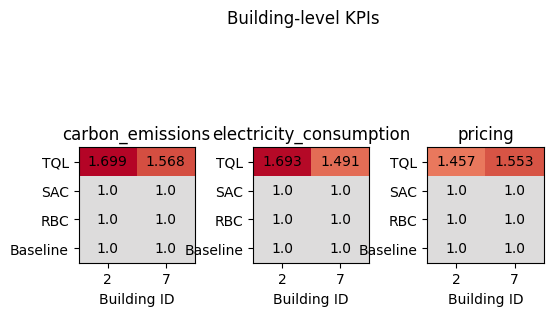

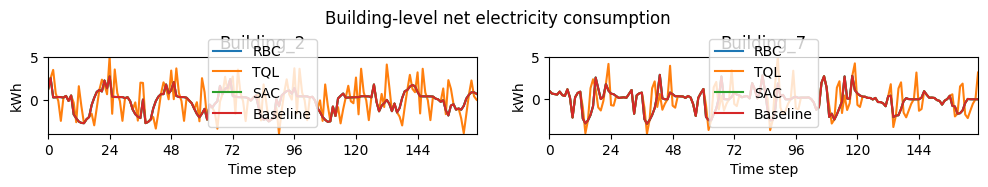

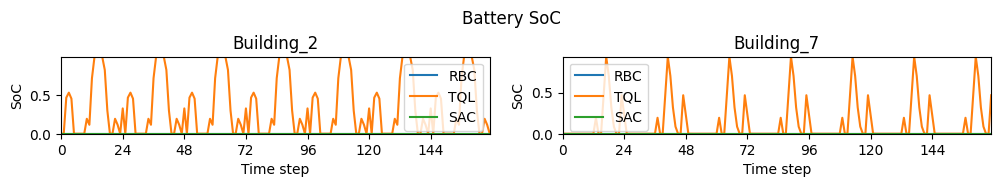

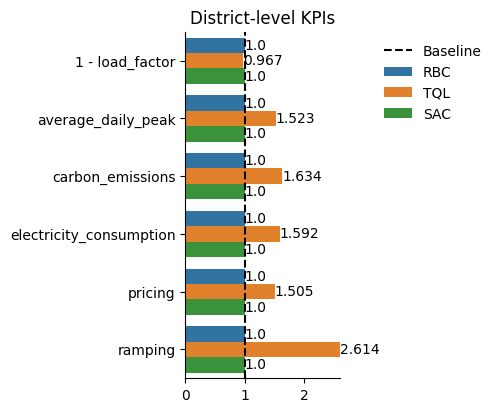

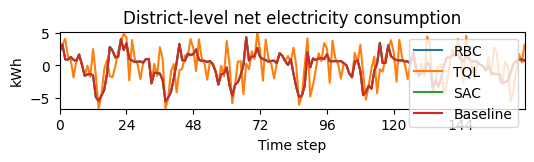

In [100]:
observations = sac_env.reset()
sac_actions_list = []

while not sac_env.done:
    actions, _ = sac_model.predict(observations, deterministic=True)
    observations, _, _, _ = sac_env.step(actions)
    sac_actions_list.append(actions)

# plot summary and compare with other control results
plot_simulation_summary({'RBC': rbc_env, 'TQL': tql_env, 'SAC': sac_env})

The figures show that the SAC agent pretty much did not learn anything! The KPIs remain unchanged compared to the baseline and the battery SoC is 0 all the time. What might be the case here? Let us have a look a the actions the SAC agent prescribed:

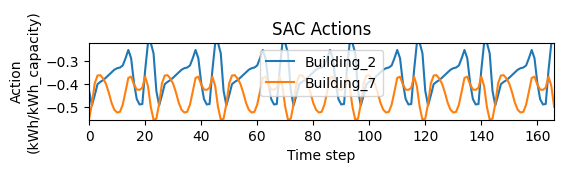

In [109]:
def plot_actions(actions_list: List[List[float]], title: str):
    fig, ax = plt.subplots(1, 1, figsize=(6, 1))
    plot_data = pd.DataFrame(actions_list, columns=[b.name for b in sac_env.buildings])
    x = list(range(plot_data.shape[0]))

    for c in plot_data.columns:
        y = plot_data[c].tolist()
        ax.plot(x, y, label=c)

    ax.legend()
    ax.set_xlabel('Time step')
    ax.set_ylabel('Action\n(kWh/kWh_capacity)')
    ax.set_title(title)
    
    return fig

fig = plot_actions(sac_actions_list, 'SAC Actions')
plt.show()

The SAC agent was calling for discharge all the time! To give it away, the reason for this behavior is the reward function that we have used to train the agent 😅.

Recall that the Bellman equation uses a reward, $r$, to update the Q-values hence the Q-Table is sensitive to the way the $r$ changes for $(s, a, s')$ tuple. That is to say, we need to make sure the reward we calculate after an action, $a$, is taken at state, $s$, is representative of how-well that action actually is at causing a desirable next state, $s'$ and improving our KPIs. If we define a poor reward function, we risk not learning quickly, or undesirable outcomes.

The reward function is a variable in the CityLearn environment. The [docs](https://www.citylearn.net/api/citylearn.reward_function.html) provides information on in-built reward functions that can be used in a simulation. The reward function used at run time is that which is defined in the schema and used to construct the environment. It can be overridden by parsing an alternative reward function that inherits from the `RewardFunction` class (see [docs](https://www.citylearn.net/api/citylearn.reward_function.html#citylearn.reward_function.RewardFunction)). Let us see what the current reward is:

In [102]:
help(sac_env.reward_function)

Help on RewardFunction in module citylearn.reward_function object:

class RewardFunction(builtins.object)
 |  RewardFunction(env: citylearn.citylearn.CityLearnEnv, **kwargs)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, env: citylearn.citylearn.CityLearnEnv, **kwargs)
 |      Initialize `Reward`.
 |      
 |      Parameters
 |      ----------
 |      env: citylearn.citylearn.CityLearnEnv
 |          Simulation environment.
 |      **kwargs : dict
 |          Other keyword arguments for custom reward calculation.
 |  
 |  calculate(self) -> List[float]
 |      Calculates default reward.
 |      
 |      The default reward is the electricity consumption from the grid at the current time step returned as a negative value.
 |      
 |      Notes
 |      -----
 |      Reward value is calculated as :math:`[\textrm{min}(-e_0, 0), \dots, \textrm{min}(-e_n, 0)]` 
 |      where :math:`e` is `electricity_consumption` and :math:`n` is the number of agents.
 |  
 |  -----------------------

### Defining a Custom Reward Function

The current reward functions is the electricity consumption from the grid at the current time step returned as a negative value. While this reward will penalize high electricity consumption, it might not be ideal for all KPIs we are trying to optimize. As you would imagine, the best way to minimize electricity consumption is to try to move all loads to the battery hence, the insistence of the agent to continue to discharge the batteries!

We want to reduce electricity consumption but also reduce its cost and emissions. Likewise, we want to reduce the peaks and ramping. One way to achieve this is to teach the agent to charge the batteries when electricity is cheap after 9 PM and before 4 PM, which typically coincides with when the grid is cleaner. But recall that each building is able to generate power provided there is solar radiation. So, we can take advantage of self-generation in the late morning to late afternoon to charge for free and discharge the rest of the day thus reducing electricity consumption, cost and emissions at the very least. Also, by shifting the early morning and evening peak loads to the batteries we can improve on our peak KPI.

We should also teach our agent to ensure that renewable solar generation is not wasted by making use of the PV to charge the batteries while they remain charged below capacity. On the flip side, the agent should learn to discharge while there is grid load and the battery still has charge left in it.

Given these learning objectives, we can now define a reward function that closely satisfies the criteria for which the agent will learn good rewards:

$
    r = \sum_{i=0}^n \Big(p_i \times |C_i|\Big)
$

$
    p_i = -\left(1 + \textrm{sign}(C_i) \times \textrm{SOC}^{\textrm{battery}}_i\right)
$

The reward function above is designed to minimize electricity cost, $C$. It is calculated for each building, $i$ and summed to provide the agent with a reward that is representative of all $n$ buildings. It encourages net-zero energy use by penalizing grid load satisfaction when there is energy in the battery as well as penalizing net export when the battery is not fully charged through the penalty term, $p$. There is no penalty nor reward given when the battery is fully charged during net export to the grid. Whereas, the penalty is maximized when there is net import from the grid when the battery is charged to capacity.

Now we define this custom reward below and set it as the reward for the SAC agent.

In [103]:
class CustomReward(RewardFunction):
    def __init__(self, env: CityLearnEnv, **kwargs):
        super().__init__(env, **kwargs)

    def calculate(self) -> List[float]:
        reward_list = []

        for b in self.env.buildings:
            net_electricity_consumption_cost = b.net_electricity_consumption_cost[-1]
            battery_capacity = b.electrical_storage.capacity_history[0]
            battery_soc = b.electrical_storage.soc[-1]/battery_capacity
            penalty = -(1.0 + np.sign(net_electricity_consumption_cost)*battery_soc)
            reward = penalty*abs(net_electricity_consumption_cost)
            reward_list.append(reward)

        if self.env.central_agent:
            reward = [sum(reward_list)]
        else:
            reward = reward_list
        
        return reward

Now let us repeat all the previous steps we took in the former SAC simulation where the only difference in the workflow is the use of our now defined custom reward function:

Number of episodes to train: 51


IntProgress(value=0, description=' Simulating:', max=8517, style=ProgressStyle(bar_color='maroon'))

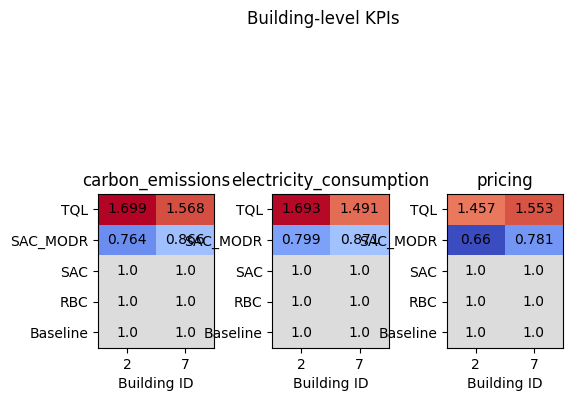

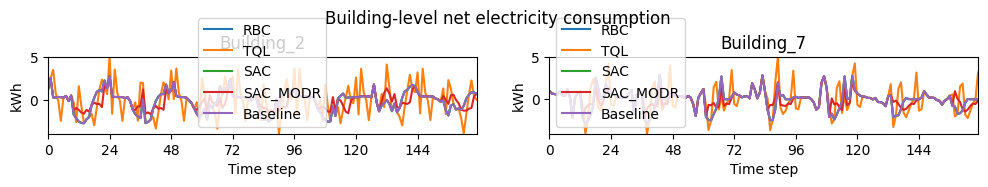

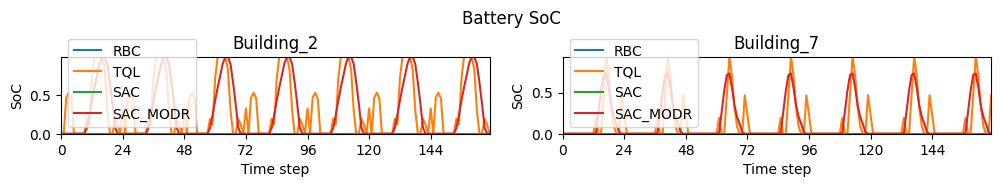

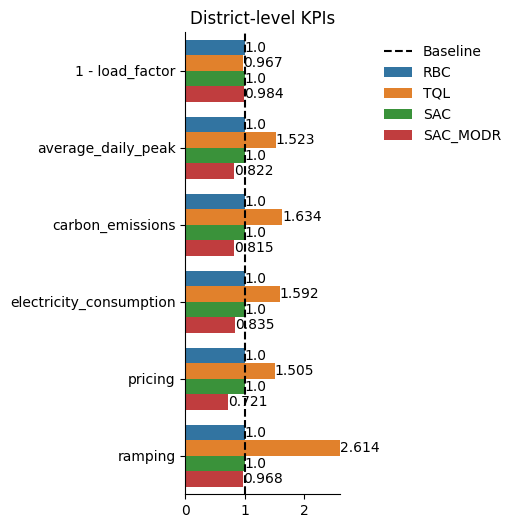

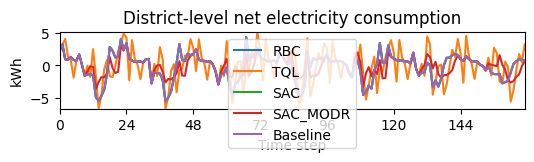

In [107]:
# ---------------------------- INITIALIZE ENVIRONMENT ----------------------------
sacr_env = CityLearnEnv(schema)

# ------------------------------- SET CUSTOM REWARD ------------------------------
sacr_env.reward_function = CustomReward(sacr_env)

# ------------------------------- WRAP ENVIRONMENT -------------------------------
sacr_env = NormalizedObservationWrapper(sacr_env)
sacr_env = StableBaselines3Wrapper(sacr_env)

# ------------------------------- INITIALIZE AGENT -------------------------------
sacr_model = SAC(policy='MlpPolicy', env=sacr_env, seed=RANDOM_SEED)

# ---------------------------------- TRAIN AGENT ---------------------------------
print('Number of episodes to train:', sac_episodes)
sac_modr_loader = IntProgress(
    value=0, min=0, max=sac_total_timesteps, bar_style='', 
    style={'bar_color': 'maroon'}, description=' Simulating:', orientation='horizontal'
)
display(sac_modr_loader)
sac_modr_callback = UpdateLoaderCallback(env=sacr_env, loader=sac_modr_loader)
sacr_model = sacr_model.learn(total_timesteps=sac_total_timesteps, callback=sac_modr_callback)

# ---------------------------- EVALUATE TRAINED AGENT ----------------------------
observations = sacr_env.reset()
sacr_actions_list = []

while not sacr_env.done:
    actions, _ = sacr_model.predict(observations, deterministic=True)
    observations, _, _, _ = sacr_env.step(actions)
    sacr_actions_list.append(actions)

# ------------------ PLOT AND COMPARE WITH OTHER CONTROL RESULTS -----------------
plot_simulation_summary({'RBC': rbc_env, 'TQL': tql_env, 'SAC': sac_env, 'SACR': sacr_env})

Finally, we have results that have improved the baseline KPIs all thanks to our custom reward function! The agent has learned to take advantage of the solar generation to charge the batteries and discharge the stored energy during the evening peak.

Let us now have a look at the actions that the agent predicted in the deterministic simulation:

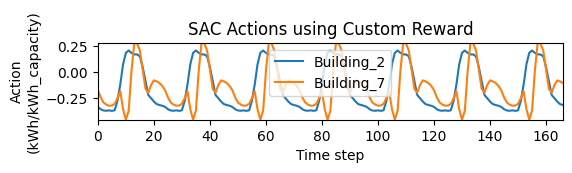

In [113]:
fig = plot_actions(sacr_actions_list, 'SAC Actions using Custom Reward')
plt.show()

The agent learned the different building needs (for a building selection of Building_2 and Building_7) as Building_7 begins to charge later than Building 2 daily. The agent discharges the batteries differently as well.

We can also investigate the convergence rate while training by looking at the sum of rewards in each episode. We expect to see the reward increase as we train on more episodes and eventually plateau when exploitation increases. Note that we did not optimize the reward function and went with the reward function 

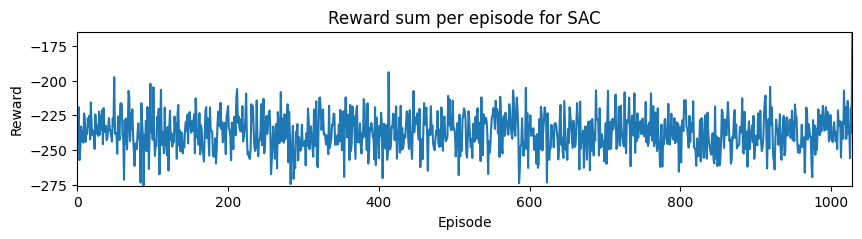

In [105]:
fig, ax = plt.subplots(1, 1, figsize=(10, 2))
ax.plot(tql_model.reward_history)
ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.set_title('Reward sum per episode for SAC')
plt.show()

<a name="methodology"></a>
# Methodology

In this section, describe a step-by-step walkthrough of the methodology, in the form of code cells. Feel free to make use of markdown headings to break this section up into smaller subsections, preferrably one section per task. 

Reminders:
*   Split the code into small, digestible chunks. 
*   Use text cells to describe each code block.
*   Avoid duplicate code through modularization.

<a name="results-and-discussion"></a>
# Results & Discussion

In this section, describe your results. Briefly describe the performance metrics and cross validation techniques used. 

In [106]:
# Insert code here. Feel free to break this up into several code
# cells, interleaved with explanatory text.

<!-- Finally, include a discussion on the limitations and important takeaways from the exercise. -->

## Limitations
<!-- *   ML algorithms and datasets can reinforce or reflect unfair biases. Reflect on the potential biases in the dataset and/or analysis presented in your tutorial, including its potential societal impact, and discuss how you might go about addressing this challenge.  -->

> Coming soon 🙂

## Next Steps
<!-- *   What do you imagine would be the next steps for your readers after finishing your tutorial?
*   Discuss other potential climate-related applications for the method or tool discussed in the tutorial.
*   Do you know of other climate-related datasets similar to the one used in this tutorial? List them here. -->

Can you still improve some KPIs without PV?
> Coming soon 🙂